7. Multi-variable Calculus
===
[13.1 Functions of Several Variables](6%20Multi-variable%20Calculus-Differentiation-1.ipynb#Functions-of-Several-Variables)<br>
[13.2 Limits and Continuuity](6%20Multi-variable%20Calculus-Differentiation-1.ipynb#Limit-and-Continuity)<br>
[13.3 Partial Differentiation](6%20Multi-variable%20Calculus-Differentiation-2.ipynb#Partial-Differentiation)<br>
[13.4 Chain Rule](6%20Multi-variable%20Calculus-Differentiation-2.ipynb#Chain-Rule)<br>
[13.5 Tangent Plane](6%20Multi-variable%20Calculus-Differentiation-2.ipynb#Tangent-Plane)<br>
[13.8 Relative Extrema](#Relative-Maxima-and-Minima)<br>
[13.9 Lagrange Multiplier](#Optimization-Problem-with-Constraints)<br>
[13.8 Method of Least Squares](#The-Method-of-Least-Squares)

In [2]:
%matplotlib inline

#rcParams['figure.figsize'] = (10,3) #wide graphs by default
import scipy
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output,display
import matplotlib.pylab as plt
from matplotlib import cm
plt.style.use('ggplot')

In [2]:
from sympy import hessian,symbols,solve,diff,sin,cos,pi

grad = lambda func, vars :[diff(func,var) for var in vars]

x,y,z=symbols("x y z",real=True)

In [3]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot,iplot_mpl
init_notebook_mode()

Relative Maxima and Minima
---

From now on, let $\vec{\mathbf{x}} = (x^1, \cdots, x^n) \in \mathbb{R}$ and
$\overrightarrow{\mathbf{x}_0} = (x_0^1, \cdots, x^n_0) \in \mathbb{R}^n$.
Also let $f_i (\vec{x}) = \frac{\partial f}{\partial x^i}$ be the $i$-th
partial derivative.

Definition
---

$z_0 = f (\vec{\mathbf{x\!}}_0)$ is called a relative maximum if there is $r> 0$ such that we have 
$f (\vec{\mathbf{\!x}}) \le f(\vec{\mathbf{x}}_0) $
for $| \vec{\mathbf{x}} - \vec{\mathbf{x}}_0 |< r$. $z_0 = f (\vec{\mathbf{x}}_0)$ 
is called a relative minimum if there is $r > 0$ such that  we have 
$f (\vec{\mathbf{x}}) \ge f(\vec{\mathbf{x}}_0) $ for $| \vec{\mathbf{x}} - \vec{\mathbf{x}}_0 |< r$.


Theorem
---

If $z_0 = f (\vec{\mathbf{x}}_0)$ is a relative extremum then $f_i(\vec{\mathbf{x}}_0) = 0$ for all $i = 1, \cdots, n$ if they exist. All such points are called **critical points** or
**stationary points**.


Although, the theorem can not state at which function attains its extrema, but
we can still use this theorem to find out all the places at which extrema of
functions attain.

Example
---
  Find all the critical points of the following functions:

**1.** $f (x, y) = x^2 + 4 y^2$. (reference the following picture at left)  

$f_x = 2 x = 0, f_y = 8 y = 0$ implies $(x, y) = (0, 0)$ is the only
      critical point of $f (x, y)$. Since $f (x, y) \ge0 = f (0, 0)$,
      $f (x, y)$ attains its minimum at $(0, 0)$.

**2.** For $f (x, y) = x^2 - 4 y^2$ (reference the following picture at right)  ,
$f_x = 2 x = 0, f_y = - 8 y = 0$ implies $(x, y) = (0,0)$ which is also the only one critical point of $f (x, y)$. But $f (0, 0)$ can not be any extremum since

$$ f (\delta, 0) \geqslant f (0, 0) \ge f (0, \delta) \text{ for any } \delta > 0 $$

**3.** From the condition,

$$ f_x = 4 x - 1 = 0, f_y = 2 y - 2 = 0, f_z = 8 z = 0 $$
the critical point is $(\frac{1}{4}, 1, 0)$ and $f (x, y, z)$ attainsits relative minimum at this critical point.

**4.** $f(x,y)=x^2+y^2-4x-6y+17=(x-2)^2+(y-3)^2+4\ge4$: this implies only critical point at $(x,y)=(2,3)$ which attains its minimuum, 4.

**5.** $f(x,y)=3-\sqrt{x^2+y^2}\le3$: critical point $(0,0)$ and maximum is 3:
$$\nabla f=\left[\frac{-x}{\sqrt{x^2+y^2}},\frac{-y}{\sqrt{x^2+y^2}}\right]=(0,0)$$
Note: $\nabla f $ fails to exit at $(0,0)$.

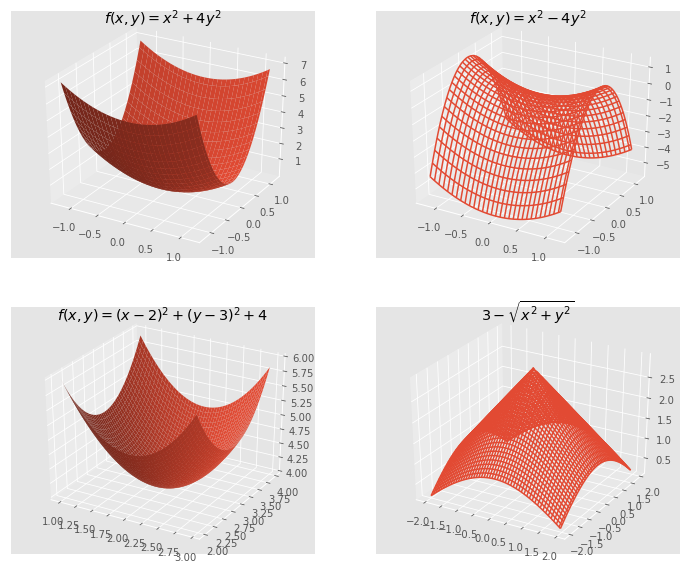

In [4]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
#ax1 = fig.gca(projection='3d')
X = np.arange(-1.2, 1.2, 0.04)
Y = np.arange(-1.2, 1.2, 0.04)
X, Y = np.meshgrid(X, Y)
g= X**2 + 4 *Y**2
ax1.plot_surface(X, Y, g)
ax1.set_title("$f(x,y)=x^2+4y^2$")

ax = fig.add_subplot(2, 2, 2, projection='3d')
X = np.arange(-1.2, 1.2, 0.04)
Y = np.arange(-1.2, 1.2, 0.04)
X, Y = np.meshgrid(X, Y)
f= X**2 - 4 *Y**2
ax.plot_wireframe(X, Y, f)
ax.set_title("$f(x,y)=x^2-4y^2$")


ax1 = fig.add_subplot(2, 2, 3, projection='3d')
#ax1 = fig.gca(projection='3d')
X = np.arange(1, 3, 0.04)
Y = np.arange(2, 4, 0.04)
X, Y = np.meshgrid(X, Y)
g= (X-2)**2 +  (Y-3)**2+4
ax1.plot_surface(X, Y, g)
ax1.set_title("$f(x,y)=(x-2)^2+(y-3)^2+4$")


from numpy import sqrt,pi
ax = fig.add_subplot(2, 2, 4, projection='3d')
X = np.arange(-2, 2, 0.04)
Y = np.arange(-2, 2, 0.04)
X, Y = np.meshgrid(X, Y)
f= 3-sqrt(X**2 +  Y**2)
ax.plot_wireframe(X, Y, f)
ax.set_title("$3-\sqrt{x^2+y^2}$")


In [25]:
from sympy import solve
x,y,z=symbols("x y z")
f=2*x*x+y*y+4*z*z-x-2*y
df=grad(f,[x,y,z])
solve(df,[x,y,z])

{x: 1/4, z: 0, y: 1}

Example
---

Suppose that $x^i, i = 1, 2, \cdots, n$ satisfies

$$ f_{\mu, \sigma} (x^i) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( -
     \frac{(x^i - \mu)^2}{2 \sigma^2} \right) $$
Define $L (\mu, \sigma^2)$ as follows:

\begin{eqnarray*}
    L (\mu, \sigma^2) & = & \prod_{i = 1}^n f_{\mu, \sigma} (x^i)\\
    & = & \prod_{i = 1}^n \left[ \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( -
    \frac{(x^i - \mu)^2}{2 \sigma^2} \right) \right]\\
    & = & \frac{1}{(2 \pi \sigma^2)^{n / 2}} \exp \left( - \sum_{i = 1}^n
    \frac{(x^i - \mu)^2}{2 \sigma^2} \right)
  \end{eqnarray*}
  What values of $(\mu, \sigma^2)$ will makes $L (\mu, \sigma^2)$ attains its
  maximum? Before answering this question, note that

- assume $(\hat{\mu}, \hat{\sigma}^2)$ is the value such that
    maximizes $L (\mu, \sigma^2)$;
- Suppose that the value of $(\hat{\mu}, \hat{\sigma}^2)$ maximizes $L
    (\mu, \sigma^2)$. This it also maximizes $\ln L (\mu, \sigma^2)$. This
    means that we have to find the value of $(\hat{\mu}, \hat{\sigma}^2)$
    that maximizes the following:

\begin{eqnarray*}
      \ln L (\mu, \sigma^2) & = & \ln \left[  \frac{1}{(2 \pi \sigma^2)^{n /
      2}} \exp \left( - \sum_{i = 1}^n \frac{(x^i - \mu)^2}{2 \sigma^2}
      \right) \right]\\
      & = & - \frac{n}{2} (\ln 2 \pi + \ln \sigma^2) - \left( \frac{1}{2
      \sigma^2} \sum_{i = 1}^n (x^i - \mu)^2 \right)
    \end{eqnarray*}
  
Then the critical value $(\hat{\mu}, \hat{\sigma}^2)$ satisfies:

\begin{eqnarray*}
    0 & = & \frac{\partial}{\partial \mu} \ln L (\mu, \sigma^2)\\
    & = & \frac{1}{\sigma^2} \sum_{i = 1}^n (x^i - \mu)\\
    0 & = & \frac{\partial}{\partial \sigma^2} \ln L (\mu, \sigma)\\
    & = & - \frac{n}{2 \sigma^2} + \frac{1}{2 (\sigma^2)^2} \sum_{i = 1}^n
    (x^i - \mu)^2
  \end{eqnarray*}
  From the first result, we can get the value, $\hat{\mu}$, as:

\begin{eqnarray*}
    & \frac{1}{\sigma^2} \sum_{i = 1}^n (x^i - \mu) = 0 & \\
    \Longrightarrow & \sum_{i = 1}^n (x^i - \mu) = 0 & \\
    \Longrightarrow & n \mu = \sum_{i = 1}^n x^i & \\
    \Longrightarrow & \hat{\mu} = \sum_{i = 1}^n x^i / n = \bar{x} & 
  \end{eqnarray*}
  i.e. $\hat{\mu}$ is the mean of sum of $x^i, i = 1, 2, \cdots, n$,
  called **sample mean**. 

$$ - \frac{n}{2 \sigma^2} + \frac{1}{2 (\sigma^2)^2} \sum_{i = 1}^n (x^i -
     \mu)^2 = 0 $$
we have:

\begin{eqnarray*}
    \widehat{\sigma^2} & = & \frac{1}{n} \sum_{i = 1}^n (x^i - \hat{\mu})^2\\
    & = & \frac{1}{n} \sum_{i = 1}^n (x^i - \bar{x})^2\\
    & = & \frac{1}{n} \sum_{i = 1}^n (x^i)^2 - \frac{2 \bar{x}}{n} \sum_{i =
    1}^n x^i + \frac{1}{n} \sum_{i = 1}^n (\bar{x})^2\\
    & = & \frac{1}{n} \sum_{i = 1}^n (x^i)^2 - 2 (\bar{x})^2 + (\bar{x})^2 =
    \frac{1}{n} \sum_{i = 1}^n (x^i)^2 - (\bar{x})^2
  \end{eqnarray*}
  so called the **sample variance**.
   

Note that the term in last result, $\color{red}{- mx_0 - mx_1 + m^2}$, is
  equal to $\color{red}{- m^2}$ since$\sum x^i = n \cdot \bar{x}$
  
Note
---
However, $\widehat{\sigma^2}$ is so-called biased estimator, since

\begin{eqnarray*}
      E \widehat{\sigma^2} & = & E \left( \frac{1}{n} \sum_{i = 1}^n (x^i -
      \bar{x})^2 \right)\\
      & = & \frac{1}{n} E \sum_{i = 1}^n (x^i - \mu - (\bar{x} - \mu))^2\\
      & = & \frac{1}{n}  \sum_{i = 1}^n E \left( \frac{n - 1}{n} (x^i - \mu)
      - \frac{1}{n} \sum^n_{j = 1 j \neq i} (x^j - \mu) \right)^2\\
      & = & \frac{1}{n} \sum_{i = 1}^n \left[ \left( \frac{n - 1}{n}
      \right)^2 \sigma^2 + \frac{n - 1}{n^2} \sigma^2 \right]\\
      & = & \frac{1}{n} \sum_{i = 1}^n \frac{n - 1}{n} \sigma^2\\
      & = & \frac{n - 1}{n} \sigma^2 \neq \sigma^2
    \end{eqnarray*}
And 

$$n \widehat{\sigma^2} / (n - 1)=\frac{1}{n - 1}
    \sum\limits^n_{i = 1} (x^i - \bar{x})^2$$ 
is called the **unbiased estimator** for $\sigma^2$ since

$$ E \left( \frac{1}{n - 1} \sum^n_{i = 1} (x^i -
       \bar{x})^2 \right) = \sigma^2 . $$



In [71]:

from sympy import Matrix,symarray,log,symbols,pi,simplify

x,mu,sigma=symbols("x m s")
n=2
X=symarray('x',n)
Xn=Matrix(X).transpose()
M=Matrix(1,n,lambda i,j: mu )
XX=(Xn-M)*(Xn-M).transpose()
f=1/sqrt(2*pi*sigma)**n*exp(-XX[0]/(2*sigma))
L=log(f)
dL=grad(L,[mu,sigma])

m_opt=solve(dL[0],mu)
m_opt

[x_0/2 + x_1/2]

In [79]:
# not completed
mu,m_opt
dL[1]
#eq_s=sigma*(dL[1]*sigma).subs(mu,m_opt)
#solve(eq_s,sigma)

2*pi*s*(-exp((-(-m + x_0)**2 - (-m + x_1)**2)/(2*s))/(2*pi*s**2) - (-(-m + x_0)**2 - (-m + x_1)**2)*exp((-(-m + x_0)**2 - (-m + x_1)**2)/(2*s))/(4*pi*s**3))*exp(-(-(-m + x_0)**2 - (-m + x_1)**2)/(2*s))

Example
---

(Multi-product Monopoly) A company produces t$\text{wo} \text{kinds}$ of
  goods, $A$ and $B$, with relative demand functions, $p_1$ and $p_2$. Suppose
  the functions satisfy:

\begin{eqnarray*}
    A & = & 100 - 2 p_1 + p_2\\
    B & = & 120 + 3 p_1 - 5 p_2
  \end{eqnarray*}
  Assume the cost function for producing $A$ and $B$ has been estimated as
  $$ C = 50 + 10 A + 20 B $$
  Then the profit function is

\begin{eqnarray*}
    P (p_1, p_2) & = & p_1 A + p_2 B - C\\
      & = & p_1 (100 - 2 p_1 + p_2) + p_2 (120 + 3 p_1 - 5 p_2) - (50 + 10 (100 - 2 p_1 + p_2) + 20 (120 + 3 p_1 - 5 p_2) \\
      & = & 1350 + 60 p_1 + 210 p_2 - 2 p_{1^{}}^2 - 5 p_2^2 + 4 p_1 p_2
\end{eqnarray*}

The critical point of profit function can be obtained by

\begin{eqnarray*}
    & P_{p_1} = P_{p_2} = 0 & \\
    \Longrightarrow & p_1 = 60 & p_2 = 45
  \end{eqnarray*}

And these imply $A = 25$ and $B = 75$. Here, it is difficulty to check
  whether profit is an extremum at this critical point. Later, we will give
  some conditions to confirm whether the function value is an extremum at
  critical points.
  

In [81]:
A,B,C,p,q=symbols("A B C p q")
P=A*p+B*q-C
PP=P.subs(C,50+10*A+20*B).subs([(A,100-2*p+q),(B,120+3*p-5*q)])
solve(grad(PP,[p,q]),[p,q])

{q: 45, p: 60}

Example
---
  Certain company sells its goods in two different brands, $A$ and $B$.
  Suppose that the relations between price function, $p_i$, and demand
  function, $x_{i,}$ $i = 1, 2$ in different sub-markets are:

\begin{eqnarray*}
    p_1 = 100 - x_1 &  & \\
    p_2 = 120 - 2 x_2 &  & 
  \end{eqnarray*}
  with \ the total cost function:
  $$ C = 20 (x_1 + x_2) $$
  Then profit function can be obtained by:

\begin{eqnarray*}
    P (x_1, x_2) & = & p_1 x_1 + p_2 x_2 - C\\
    & = & 80 x_1 - x_1^2 + 100 x_2 - 2 x_2^2
  \end{eqnarray*}
  It is trivial that the maximum exists. From the first partial derivatives
  properties, the relative extrema must occurs at

\begin{eqnarray*}
    P_{x_1} & = & 80 - 2 x_1 = 0\\
    P_{x_2} & = & 100 - 4 x_2 = 0
  \end{eqnarray*}
  And this implies that there exists only one stationary point, $(x_1, x_2) =
  (40, 25)$, and at which the maximum attains.

Example
---
  Two firms produce identical products with same price:

$$ p = 150 - x_1 - x_2 $$
  and with zero cost. For each firms, their profits are in the following
  manners respectively:

\begin{eqnarray*}
    P_1 & = & p x_1 = (150 - x_1 - x_2) x_1\\
    P_2 & = & p x_2 = (150 - x_1 - x_2) x_2
  \end{eqnarray*}
  Then if they want to get maximum profits, the first partial derivatives have
  to be held:

\begin{eqnarray*}
    \frac{\partial P_1}{\partial x_1} & = & 0\\
    \frac{\partial P_2}{\partial x_2} & = & 0
  \end{eqnarray*}
  And these imply

\begin{eqnarray*}
    \widehat{x_1} = \frac{150 - x_2}{2} &  & \\
    \widehat{x_2} = \frac{150 - x_1}{2} &  & 
  \end{eqnarray*}
  From above results, the maximum occurs dependent on other stationary point.
  Therefore, two results have to be held simultaneously. In other words, we
  have

$$ x_1 = x_2 = \frac{150}{3} = 50 $$
  From the graphs, the demand functions are intersected at this point,
  $\left(\frac{100}{3}, \frac{100}{3}\right)$:
  
 
This point is called **Cournot equilibrium**.



Example
---
  Suppose that there are $n$ little firms produce identical products now. The
  price function is
  $$ p = 150 - \sum_{i = 1}^n x_i $$
  with zero cost for simplicity. Then at stationary points, the following
  relation holds for any $k = 1, \cdots, n$:

\begin{eqnarray*}
    & P_k = p x_k & = x_k \left(150 - \sum_{i = 1}^n x_i\right)\\
    \Longrightarrow & 0 = \frac{\partial P_k}{\partial x_k} & = \left(150 - \sum_{i= 1}^n x_i\right) - x_k
  \end{eqnarray*}
Since the equation still remains unchanged even by interchanging indexes
  with any two different variables, $x_i$ and $x_j$, it is obvious that
  all the $x_i$'s are equal. Thus replace all $x_k$'s with $\widehat{x}$,
  then:

\begin{eqnarray*}
    & 0 =\left(150 - \sum_{i = 1}^n \widehat{x_{}}\right) - \widehat{x_{}} & \\
    \Longrightarrow & \widehat{x_{}} = \frac{150}{n + 1} & \text{ for } k = 1,
    \cdots, n
  \end{eqnarray*}
  The last example is just in the case, $n = 2$.

In above examples, the first derivative properties do not assure at which
critical points are extrema. Some strongly conditions are needed to confirm
whether there are extrema at critical point.

Definition
---
Suppose that $M = (m_{i j})_{n \times n}$ is a $n \times n$ square matrix
  and $\vec{h} = \left(
    h_1,h_2,\cdots,h_n\right)_{1 \times n}$ is any $1 \times n$ vector. Then $M$ is
  called **positive definite** 
if $\vec{h}^t M \vec{h} = \sum\limits^n_{i,
  j = 1} h_i m_{i j} h_j > 0$ and called **negative definite** if
  $\vec{h}^t M \vec{h} < 0$.


Define the Hessian matrix of function $f (\vec{x})$ with its minor matrices
as:

\begin{eqnarray*}
  H & = & (f_{i j})_{n \times n}\\
  H_1 = (f_{11}) & \cdots & H_k = (f_{i j})_{k \times k}, k = 1, \cdots, n - 1
\end{eqnarray*}
and let $|H_i |$ be the determinant of $H_i$. For multi-variable functions, we
have the following theorem:



The definite properties of Hessian matrices can be determined by calculating
determinants of Hessian matrices and their minor matrices.



Theorem
---
Let $$A = \frac{\partial^2 f}{\partial x^2} (x_0, y_0), B =
  \frac{\partial^2 f}{\partial y \partial x} (x_0, y_0) = \frac{\partial^2
  f}{\partial x \partial y} (x_0, y_0),C = \frac{\partial^2 f}{\partial
  y^2} (x_0, y_0) \text{ and }\frac{\partial f}{\partial x} (x_0, y_0) =
  \frac{\partial f}{\partial y} (x_0, y_0) = 0$$ where $(x_0, y_0)$ is the
  critical point of $f (x, y)$, $D = A C - B^2$, then
1. if $D > 0$ and $A < 0$ , $f (x_0, y_0)$ is  a relative maximum,
- if $D > 0$ and $A > 0$ , $f (x_0, y_0)$ is  a relative minimum,
- if $D < 0$ , $(x_0, y_0, f (x_0, y_0))$ is a saddle point,
- if $D = 0$, no conclusion.

Here the **Hessian matrix** for function $f (x, y)$ is defined as
  follows:

$$ H = \left(\begin{array}{cc}
       \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial y
       \partial x}\\
       \frac{\partial^2 f}{\partial x \partial y} & \frac{\partial^2
       f}{\partial y^2}
     \end{array}\right) = \left(\begin{array}{cc}
       f_{11} & f_{12}\\
       f_{21} & f_{22}
     \end{array}\right) $$
  and with determinant $D = |H|$. For higher dimension case, $n \ge 2$,
  then:
1. if $|H_k | > 0$, for $k = 1, \cdots, n$, $f (\vec{x}_0)$  is  a relative minimum,
- if $|H_1 | < 0, |H_2 | > 0, \cdots$, $f (\vec{x}_0)$ is a relative maximum,

  where $H_k$ is the submatrix of $H$ and defineds as follows:

<img src="imgs/8/cal7-18.png" width=80% />    

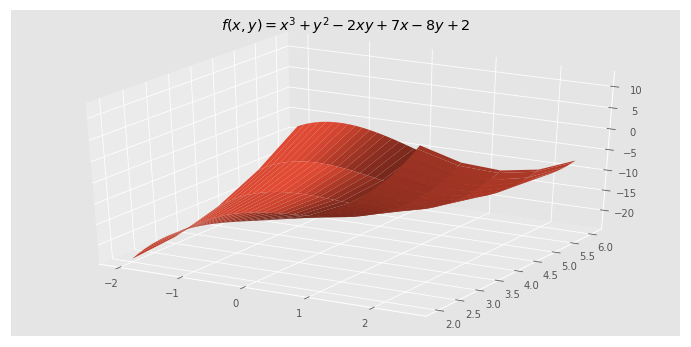

In [5]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
#ax1 = fig.gca(projection='3d')
X = np.arange(-2,2.5, 0.04)
Y = np.arange(2, 7)
X, Y = np.meshgrid(X, Y)
g= X**3+Y**2-2*X*Y+7*X-8*Y+2
ax1.plot_surface(X, Y, g)
ax1.set_title("$f(x,y)=x^3+y^2-2xy+7x-8y+2$")


Example
---
  Suppose that $f (x, y) =x^3+y^2-2xy+7x-8y+2.$ Then the
  critical value comes from the following relations:

\begin{eqnarray*}
    & f_x = 3x^2-2y+7 = 0 \text{ and } f_y = 2y-2x-8 = 0 & \\
    \Longrightarrow & (x, y) = (3, 1) & 
  \end{eqnarray*}
  i.e. there are two  critical values, $(x, y) = P_1=(1,5), (x, y) = P_2=\left(-1/3,11/3\right)$. By the way, we also have

\begin{eqnarray*}
     H_2 &=& \left(\begin{array}{cc}
      f_{11} & f_{12}\\
      f_{21} & f_{22}
    \end{array}\right)  & \\
    & = &12x-4
  \end{eqnarray*}
1. $P_1$, $f_{xx}(P_1)=6>0,H(P_1)=8>0$ imply $f(P_1)$ is local minimum;
-  $P_2$, $H(P_2)=-8<0$ imply $f(P_2)$ is saddle point;


Definition
---
$f(\mathbf{x_0})$ is called absolute maximum of $f(\mathbf{x})$ if $f(\mathbf{x_0})\ge f(\mathbf{x})$   for any $\mathbf{x}$ in its domain; and is called absolute minimum if  $f(\mathbf{x_0})\le f(\mathbf{x})$.

Theorem
---
Continuous function $f(\mathbf{x})$ should attain its both absolute maximum and minimum in closed domain. This means that the absolute extrema of $f(\mathbf{x})$ could be found from the following steps:
1. find out all critical values.
- evaluate the function values at the points of (1) and the boundary of $D$,
- absolute maximum is the largest of (2) and the absolute minimum is smallest of (2).

Note
---
Extrema on the boundary could be evaluated by the **Lagrange's method** or called **mountain-pass** theorem, introduced later. 

In [6]:
import plotly.graph_objs as go

x=np.linspace(-1,3.5,101)
y=np.linspace(-1,2.5,101)

x,y=np.meshgrid(x,y)
f= 2*x**2+y**2-4*x-2*y+3

t=np.linspace(0,1,101)
L1x=3*t
L1z=2*L1x**2-4*L1x+3
L3z=2*L1x**2-4*L1x+3

L2y=2*t
L2z=2*3**2+L2y**2-4*3-2*L2y+3
L4z=2*0**2+L2y**2-4*0-2*L2y+3
#zt=xt**2-xt*yt+yt**2-xt+yt-6
surface = go.Surface(x=x, y=y, z=f,opacity=0.8)
L1 = go.Scatter3d(x=L1x, y=0*L1x, z=0*L1x,
            mode = "lines",
            line = dict(color='orange',width = 5)
            )  
L3 = go.Scatter3d(x=L1x, y=0*L1x+2, z=0*L1x,
            mode = "lines",
            line = dict(color='orange',width = 5)
            )
L2 = go.Scatter3d(x=0*L2y+3, y=L2y, z=0*L2y,
            mode = "lines",
            line = dict(color='orange',width = 5)
            )
L4 = go.Scatter3d(x=0*L2y, y=L2y, z=0*L2y,
            mode = "lines",
            line = dict(color='orange',width = 5)
            )
L1f = go.Scatter3d(x=L1x, y=0*L1x, z=L1z,
            mode = "lines",
            line = dict(color='red',width = 5)
            )  
L3f = go.Scatter3d(x=L1x, y=0*L1x+2, z=L3z,
            mode = "lines",
            line = dict(color='red',width = 5)
            ) 
L2f = go.Scatter3d(x=0*L2y+3, y=L2y, z=L2z,
            mode = "lines",
            line = dict(color='red',width = 5)
            )
L4f = go.Scatter3d(x=0*L2y, y=L2y, z=L4z,
            mode = "lines",
            line = dict(color='red',width = 5)
            )

data = [surface,L1,L2,L3,L4,L1f,L3f,L2f,L4f]

fig = go.Figure(data=data)
iplot(fig)

Example
---
  Find the both absolute extrema values of  $f (x, y) =2x^2+y^2-4x-2y+3$ on the rectangle:
  $$ D=\{0\le x\le3,0\le y\le2\}$$
1. critical value:
\begin{eqnarray*}
    & f_x = 4x-4 = 0 \text{ and } f_y = 2y-2 = 0 & \\
    \Longrightarrow & (x, y) = (1, 1) & 
  \end{eqnarray*}
i.e. there are only one critical value, $(x,y) = (1,1)$ with $f(x,y)|_{(x,y)=(1,1)}=0$.
- Let the boundary of $D$ be:
$$L_1\cup L_2\cup L3\cup L_4=\{y=0\}\cup\{x=3\}\cup\{y=2\}\cup\{x=0\}$$
   - $L_1=\{y=0\}$:
     \begin{eqnarray}
     f_{L_1}&=&f(x,0)\text{ and } 0\le x\le3\\
             &=& 2x^2-4x\\
     f_{L_1}'=0&\Rightarrow&4x-4=0\to x=1 \text{ and } x=3\\
         &\rightarrow& f(1,0)=1,f(3,0)=9 
     \end{eqnarray}
   - $L_2=\{x=3\}$:
     \begin{eqnarray}
     f_{L_2}&=&f(y,3)\text{ and } 0\le y\le2\\
             &=& y^2-2y+9\\
     f_{L_2}'=0&\Rightarrow&2y-2=0\to y=1 \text{ and } y=0,2\\
         &\rightarrow& f(3,1)=8,f(3,0)=f(3,2)=9 
     \end{eqnarray} 
   - $L_3=\{y=2\}$:
     \begin{eqnarray}
     f_{L_3}&=&f(x,0)\text{ and } 0\le x\le3\\
             &=& 2x^2-4x+3\\
     f_{L_3}'=0&\Rightarrow&4x-4=0\to x=1 \text{ and } x=3\\
         &\rightarrow& f(1,2)=1,f(3,2)=9 
     \end{eqnarray} 
   - $L_4=\{x=0\}$:
     \begin{eqnarray}
     f_{L_4}&=&f(y,0)\text{ and }0\le y\le2\\
             &=& y^2-2y+3\\
     f_{L_4}'=0&\Rightarrow&2y-2=0\to y=1 \text{ and } y=0,2\\
         &\rightarrow& f(0,1)=2,f(0,0)=f(0,2)=3
     \end{eqnarray} 
Thus the absolute maximum is 9 and mabsolute minimum is 0.     

Example
---
  Suppose that $f (x, y) = 4 x - 2 y - x^2 - 2 y^2 + 2 x y - 10.$ Then the
  critical value comes from the following relations:

\begin{eqnarray*}
    & f_1 = 4 - 2 x + 2 y = 0 \text{ and } f_2 = - 2 - 4 y + 2 x = 0 & \\
    \Longrightarrow & (x, y) = (3, 1) & 
  \end{eqnarray*}
  i.e. only one critical value $(x, y) = (3, 1)$. By the way, we also have

\begin{eqnarray*}
    & H_2 = \left(\begin{array}{cc}
      f_{11} & f_{12}\\
      f_{21} & f_{22}
    \end{array}\right) = \left(\begin{array}{cc}
      - 2 & 2\\
      2 & - 4
    \end{array}\right) & \\
    \Longrightarrow & f_{11} = - 2 < 0 \text{ and }  D = f_{11} f_{22} -
    (f_{12})^2 = 4 > 0 & 
  \end{eqnarray*}

Therefore $f (3, 1) = - 5$ is relative maximum.

Example
---
  $f (x, y) = x^4 + y^4 - 4 x y$,Then the critical values come from the
  following relations:

\begin{eqnarray*}
    & f_1 = 4 x^3 - 4 y = 0 \text{ and } f_2 = 4 y^3 - 4 x = 0 & \\
    \Longrightarrow & x = y^3 \text{ and } y = x^3  (\text{i.e. } x = x^9) & \\
    \Longrightarrow & (x, y) = (0, 0) \text{ or } (\pm 1, \pm 1) & 
  \end{eqnarray*}
  And the Hessian matrix is:

$$ H = \left(\begin{array}{cc}
       12 x^2 & - 4\\
       - 4 & 12 y^2
     \end{array}\right) $$

**1.** at $(x, y) = (0, 0)$,

$$ D = \left| \left(\begin{array}{cc}
         0 & - 4\\
         - 4 & 0
       \end{array}\right) \right| = - 16 < 0 $$
    saddle point.

**2.** at $(x, y) = (\pm 1, \pm 1)$:

$$  D = \left| \left(\begin{array}{cc}
            12 & - 4\\
            - 4 & 12
          \end{array}\right) \right| = 128 > 0 $$

with $f_{11} (\pm 1, \pm 1) = 12 > 0$. Then $f (- 1, - 1) = - 2$ is a
    relative minimum and $f (1, 1) = - 128$ is also a relative minimum. 

Example
---
  Revisit the previous example $f (x, y, z) = 2 x^2 + y^2 + 4 z^2 - x - 2 y$.
  We have:

\begin{eqnarray*}
    f_1 & = & 4 x - 1\\
    f_2 & = & 2 y - 2\\
    f_3 & = & 8 z\\
    H & = & \left(\begin{array}{ccc}
      f_{11} & f_{12} & f_{13}\\
      f_{21} & f_{22} & f_{23}\\
      f_{31} & f_{32} & f_{33}
    \end{array}\right)\\
    & = & \left(\begin{array}{ccc}
      4 & 0 & 0\\
      0 & 2 & 0\\
      0 & 0 & 8
    \end{array}\right)
  \end{eqnarray*}
  From the last result, we have:

\begin{eqnarray*}
    |H| & = & 64 > 0\\
    |H_1 | & = & 4 > 0\\
    |H_2 | & = & 4 \cdot 2 = 8 > 0\\
    |H_3 | & = & |H| > 0
  \end{eqnarray*}

Therefore, $f (x, y, z)$ actually attains its relative minimum at the
  critical point, $(1 / 4, 1, 0)$.

In [14]:
from sympy import symbols,diff,solve,hessian

f=2*x**2+y**2+4*z**2-x-2*y

cpts=solve(grad(f,[x,y,z]),[x,y,z])
H=hessian(f,[x,y,z]);H2=hessian(f,[x,y])  
H_det=H.det();
H2_det=H2.det()   
print("the critical point is (%s,%s,%s) and det(H3)=%s, det(H2)=%s" %(cpts[x],cpts[y],cpts[z],H_det,H2_det))           

the critical point is (1/4,1,0) and det(H3)=64, det(H2)=8


Example
---
  If a company produces two products, $A$ and $B$, with prices 100 and 300
  respectively. The total cost in producing $x$ units of $A$ and $y$ units of
  $B$ is

$$ C (x, y) = 2000 + 50 x + 80 y + x^2 + 2 y^2 $$
  Revenue $R = 100 x + 300 y$ and

\begin{eqnarray*}
    P (x, y) & = & R (x, y) - C (x, y)\\
    & = & - 2000 + 50 x + 220 y - x^2 - 2 y^2
  \end{eqnarray*}
  with $o \leqslant x, y$. First we want to find the critical point:

\begin{eqnarray*}
    \nabla P = \vec{0} & \Longrightarrow & \left( \frac{\partial P}{\partial
    x}, \frac{\partial P}{\partial y} \right) = \vec{0}\\
    & \Longrightarrow & 50 - 2 x = 0 \text{and} 220 - 4 y = 0
  \end{eqnarray*}
  i.e. only one critical point $(x, y) = (25, 55)$. Also the Hessian matrix is
  as follows:

$$ H = \left(\begin{array}{cc}
       - 2 & 0\\
       0 & - 4
     \end{array}\right) $$
  $P_1 = - 2 < 0$ but $|H| = 8 > 0$. This means that $P (x, y)$ attains its
  relative maximum at $(25, 55)$. At this point, $P (x, y)$ attains its
  maximum too.

Exercise
---
  Find the relative extrema of $f (x, y) = x^3 + y^3 - 3 x y$ if any.

**1.** Find the critical point(s) as follows:

\begin{eqnarray*}
    \nabla f = \vec{0} & \Longrightarrow & (3 x^2 - 3 y, 3 y^2 - 3 x) = (0,0)\\
      & \Longrightarrow & y = x^2 \text{ and } x = y^2  (i.e. x = x^4)\\
      & \Longrightarrow & (x, y) = (0, 0) \text{ or } (1, 1)
  \end{eqnarray*}
  There exist two critical points.
**2.**  Find Hessian matrix:

$$ \begin{array}{lll}
       H & = & \left(\begin{array}{cc}
         6 x & - 3\\
         - 3 & 6 y
       \end{array}\right)
     \end{array} $$
  - $(x, y) = (0, 0)$: $|H| = - 9 < 0 \Rightarrow f (0, 0)$ is a saddle
    point.
  - $(x, y) = (1, 1)$: $|H| = 36 - 9 > 0$ and $f_{11} = 6 > 0
    \Rightarrow f (1, 1)$ is a relative minimum.


Exercise
---

  Find the relative extrema of $f (x, y) = \exp (- x^2 - y^2)$ if any.

**1.** Find the critical point(s) as follows:

\begin{eqnarray*}
    \nabla f = \vec{0} & \Longrightarrow & (- 2 x e^{- x^2 - y^2}, - 2 y e^{-
    x^2 - y^2}) = (0, 0)\\
    \  & \Longrightarrow & (x, y) = (0, 0)
  \end{eqnarray*}
  There exists one critical point.

**2.** Find Hessian matrix:

$$ \begin{array}{lll}
       H & = & \left(\begin{array}{cc}
         (4 x^2 - 2) e^{- x^2 - y^2} & 4 x y e^{- x^2 - y^2}\\
         4 x y e^{- x^2 - y^2} & (4 y^2 - 2) e^{- x^2 - y^2}
       \end{array}\right)
     \end{array} $$

$(x, y) = (0, 0)$: $|H| = 4 > 0$ and $f_{11} (0, 0) = - 2 < 0\Longrightarrow f (0, 0)$ is a relative maximum.




In general, it is not difficulty to find extrema for functions without any
restriction. The following theorem is an extension in the case of all
variables defined within intervals, i.e. $ x^i \in [a^i, b^i]$,
for all $1 \le i \le n$:

Theorem
---
  Suppose that

$$ \text{Domain} (f) = \left\{ \mathbf{x} | x^i \in
     [a^i, b^i], \text{ for all } 1 \leqslant i \leqslant n \} 
     \right. $$
  and $f (\mathbf{x})$ is smooth with all the first order derivatives in
  domain. Suppose that $f (\mathbf{x})$ attains it global maximum at
  $\mathbf{x}=\mathbf{x}^{\ast}$, then one or both following condition(s)
  must hold:
1. $f_i (\mathbf{x}^{\ast}) \le 0$ and $((x^i)^{\ast} - a^i_{})
    f_i (\mathbf{x}^{\ast}) = 0$;
- $f_i (\mathbf{x}^{\ast}) \ge 0$ and $(b^i - (x^i)^{\ast})
    f_i (\mathbf{x}^{\ast}) = 0$.
  for all $1 \leqslant i \leqslant n$.

Proof
---
<img src="imgs/8/cal7-20.png" width=80% />    

Since the domain is in the rectangular form, there are only three
    possibilities in each direction:
1. $\mathbf{x}^{\ast}$ is an interior point of domain, then $f_i(\mathbf{x}^{\ast}) = 0$ for any $i$ since it is smooth.
- It is at boundary and suppose that it is increasing, then $(x^i)^{\ast} = b^i$ and $f_i (\mathbf{x}^{\ast}) > 0$.
- It is at boundary and suppose that it is decreasing, then $(x^i)^{\ast} = a^i_{}$ and $f_i (\mathbf{x}^{\ast}) < 0$.

And these prove this theorem.  

Similarly, we have the following theorem to describe the behavior as minimum
of function within bounded region:

Theorem
---
  Suppose that
$$ \text{Domain} (f) = \left\{ \vec{x} | x_i \in [a_i,
     b_i], \text{ for all $1 \leqslant i \leqslant n$:} \} \right.
  $$
  and $f (\mathbf{x})$ is smooth with all its first order derivatives.
  Suppose that $f (\mathbf{x})$ attains it global minimum at
  $\mathbf{x}=\mathbf{x}^{\ast}$, then one or both following condition(s)
  must hold:
1. $f_i (\mathbf{x}^{\ast}) \geqslant 0$ and $((x^i)^{\ast} - a^i_{})
    f_i (\mathbf{x}^{\ast}) = 0$;
- $f_i (\mathbf{x}^{\ast}) \leqslant 0$ and $(b^i - (x^i)^{\ast})
    f_i (\mathbf{x}^{\ast}) = 0$

  for all $1 \leqslant i \leqslant n$.

  
**Proof**

<img src="imgs/8/cal7-21.png" width=80% />     

There are only three possibilities in each direction:
1. $\mathbf{x}^{\ast}$ is an interior point of domain, then $f_i
      (\mathbf{x}^{\ast}) = 0$ for any $i$ since it is smooth.
- It is at boundary and suppose that it is decreasing, then $(x^i)^{\ast} = b^i$ and $f_i (\mathbf{x}^{\ast}) < 0$.
- It is at boundary and suppose that it is increasing, then $(x^i)^{\ast} = a^i_{}$ and $f_i (\mathbf{x}^{\ast}) > 0$.

 And these prove this theorem.




Example
---
  Suppose that one factory inputs its goods from two different supply plants,
  $A$ and $B$, with different costs, $4$ and $6$ each respective. And suppose
  the price function in the market is the same and is decided as $p (x, y) =
  100 - x - y$ where $x$ and $y$ are the demand functions. Discuss the the
  maxima problem due to the following situations:
1. $0 \leqslant x, y$
- $0 \leqslant x \leqslant 30$, $0 \leqslant y \leqslant 30$

**Solve**
  
**1.** The profit function is

\begin{eqnarray*}
      P (x, y) & = & p (x, y)  (x + y) - 4 x - 6 y\\
      & = & 100 (x + y) - (x + y)^2 - 4 x - 6 y
    \end{eqnarray*}
    with all its first derivative:

\begin{eqnarray*}
      P_x (x, y) & = & 100 - 2 (x + y) - 4\\
      P_y (x, y) & = & 100 - 2 (x + y) - 6
    \end{eqnarray*}
    Obviously, it is impossible to get the equations simultaneously:

\begin{eqnarray*}
      P_x (x, y) = 0 & \Longrightarrow & 100 - 2 (x + y) - 4 = 0\\
      P_y (x, y) = 0 & \Longrightarrow & 100 - 2 (x + y) - 6 = 0
    \end{eqnarray*}

since it is absolutely inconsistent. Does it imply no maximum for $P (x,y)$? Certainly not. Think about it: if you can input more cheaper goods,
$4$ each, why not do so? The first derivative test can only be used to
confirm that the maximum does not occur at the point, i.e. satisfying $P_x= P_y = 0$.
    

In this case, we always choose to input from $A$ with cost $4$ each but not from $B$. This just implies:

\begin{eqnarray*}
      y = 0 & \text{ and } & P (x, y) = 100 x - x^2 - 4 x
    \end{eqnarray*}

Then $P (x, y)$ attains its maximum at $(x, y) = (48, 0)$. Note that we have

\begin{eqnarray*}
      \vec{x}^{\ast} = (x^{\ast}, y^{\ast}) = (48, 0) & \Longrightarrow &
      (x^{\ast} - 0) P_x (\vec{x}^{\ast}) = 0 \text{ and } P (\vec{x}^{\ast}) =
      0\\
      & \Longrightarrow & P_y (x^{\ast}, y^{\ast}) = - 2 - 2 y^{\ast} < 0
      \text{ and } (y^{\ast} - 0) P_x (\vec{x}^{\ast}) = 0
    \end{eqnarray*}

**2.** Since the it is beneficial for us to input from $A$, certainly $x$ is equal to $30$, the maximal output from $A$. This concludes

$$ P (x, y) = P (30, y) = 100 (30 + y) - (30 + y)^2 - 10 - 6 y $$
and

\begin{eqnarray*}
      P_x (x, y) = 0 & \Longrightarrow & 100 - 2 (x + y) - 4 = 0\\
      P_y (x, y) = 0 & \Longrightarrow & 100 - 2 (x + y) - 6 = 0
    \end{eqnarray*}
    
    
By the first derivative test, $P (x, y)$ will attains its maxima at $x =30$ (boundary point) and $y = 17$, coming from the fact, $P_y (30, y) =0$. In this case,

\begin{eqnarray*}
      \vec{x}^{\ast} = (x^{\ast}, y^{\ast}) = (30, 17) & \Longrightarrow & (30
      - x^{\ast}) P_x (\vec{x}^{\ast}) = 0 \text{ and } P_x (\vec{x}^{\ast}) <
      0\\
      & \Longrightarrow & P_y (\vec{x}^{\ast}) = 0
    \end{eqnarray*}


Example
---
Two kinds of eggs, white and brown, are sold. The daily sales for white eggs
  will be $W (x, y) = 30 - 15 x + 3 y$ and daily sales for brown eggs will be
  $B (x, y) = 20 - 12 y + 2 x$ where $x, y$ are the sale prices for white and
  brown eggs respectively. Then the revenue is

\begin{eqnarray*}
    R (x, y) & = & x W (x, y) + y B (x, y)\\
    & = & x (30 - 15 x + 3 y) + y (20 - 12 y + 2 x)\\
    & = & 30 x + 20 y - 15 x^2 + 5 x y - 12 y^2
  \end{eqnarray*}
  The critical point is calculated as follows:

\begin{eqnarray*}
    \nabla R = \vec{0} & \Longrightarrow & (30 - 30 x + 5 y, 20 + 5 x - 24 y)
    = (0, 0)\\
    & \Longrightarrow & (x, y) = \left( \frac{164}{139}, \frac{150}{139}
    \right)
  \end{eqnarray*}
  Also the Hessian matrix is as follows:

\begin{eqnarray*}
    H & = & \left(\begin{array}{cc}
      - 30 & 5\\
      5 & - 24
    \end{array}\right)
  \end{eqnarray*}
  $R_1 = - 30 < 0$ and $|H| > 0$. Then at $(x, y) = \left(\frac{164}{139},
  \frac{150}{139}\right)$, $R (x, y)$ attains its relative maximum and maximum too.

Example
---

Suppose that a firm produces one kind of output, $y$, by two inputs, $K$,
  called capital, and $L$, called labor. Each unit of capital costs $u$ and
  each unit of labor costs $v$. And the production function follows the
  Cobb-Douglas relation:

$$ P (K, L) = A K^{\alpha} L^{\beta} \text{ where } A, \alpha \text{ and } \beta
     > 0 $$
If the price function is constant $p$, find the condition at which the
  profit function attains its extremum and determine the condition at which
  profit function actually attains its maximum at the critical point.
  
**Sol**
  

 The profit function, by definition, is

\begin{eqnarray*}
      P (K, L) & = & R (K, L) - C (K, L)\\
      & = & p A K^{\alpha} L^{\beta} - u K - v L
    \end{eqnarray*}
By the first order condition, the extremum occurs at which

\begin{eqnarray*}
      0 = \frac{\partial P}{\partial K} & = p \alpha A K^{\alpha - 1}
      L^{\beta} - u & \\
      0 = \frac{\partial P}{\partial L} & = p \beta A K^{\alpha} L^{\beta - 1}
      - v & 
    \end{eqnarray*}
Then

\begin{eqnarray*}
  & \frac{L}{K} & = \frac{u \beta}{v \alpha}\\
   \Longrightarrow & p \alpha A K^{\alpha - 1} \left( \frac{u \beta}{v\alpha} K \right)^{\beta} & = u\\
 \Longrightarrow & \hat{K} & = \left( \frac{v^{\beta} \alpha^{\beta -
    1}}{p A u^{\beta - 1} \beta^{\beta}} \right)^{\frac{1}{\alpha + \beta -1}}\\
 \Longrightarrow & \hat{L} & = \left( \frac{u^{\alpha} \beta^{\alpha -
    1}}{p A v^{\alpha - 1} \alpha^{\alpha}} \right)^{\frac{1}{\alpha + \beta - 1}}
\end{eqnarray*}

If $P (K, L)$ attains its maxima at $(\hat{K}, \hat{L})$, then

\begin{eqnarray*}
  & |H| > 0 \text{ and } |H_1 | < 0 & \\
  \Longrightarrow & \frac{\partial^2 P}{\partial L^2} = p \alpha (\alpha -1) A K^{\alpha - 2} L^{\beta} < 0 & \\
  & |H| = (p A)^2 \alpha (\alpha - 1) \beta (\beta - 1) K^{\alpha + \beta - 2} L^{\alpha + \beta - 2} & \\
  & - (p A \alpha \beta)^2 K^{\alpha + \beta - 2} L^{\alpha + \beta - 2}< 0 & \\
  &  & \\
 \Longrightarrow & \alpha < 1 \text{ and } \alpha + \beta < 1 & 
\end{eqnarray*}

In [7]:
def plot3d(x,y,z):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=plt.cm.binary,alpha=0.9)
    #ax.contour(x, y, z,  lw=3, cmap="autumn_r", linestyles="solid", zdir='z',offset=0)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_zlim(-7, 25)
    #ax.scatter3D([1],[1],[0],color=(0,0,0));
    ax.arrow(x=1,y=1,dx=0.1,dy=0.1)
    t=np.linspace(0,2*np.pi,101)
    xt=np.cos(t)
    yt=np.sin(t)
    zt=xt**2-xt*yt+yt**2-xt+yt-6
    ax.plot3D(xt,yt,zt)
    #ax.plot3D(xt,yt,np.sqrt(xt)+np.sqrt(yt))

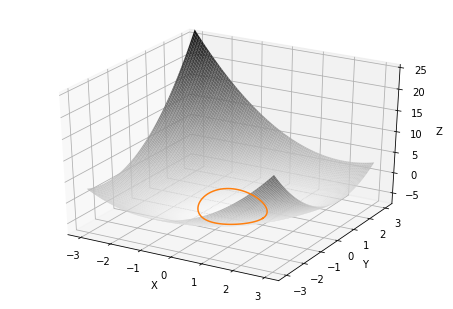

In [53]:
x=np.linspace(-3,3,101)
y=np.linspace(-3,3,101)

x,y=np.meshgrid(x,y)
f= x**2-x*y+y**2-x+y-6
plot3d(x,y,f)

In [5]:
import plotly.graph_objs as go

x=np.linspace(-3,3,101)
y=np.linspace(-3,3,101)

x,y=np.meshgrid(x,y)
f= x**2-x*y+y**2-x+y-6
g=x**2-x*y+y**2
t=np.linspace(0,2*np.pi,101)
xt=np.cos(t)
yt=np.sin(t)
zt=xt**2-xt*yt+yt**2-xt+yt-6
surface = go.Surface(x=x, y=y, z=f,opacity=0.9)
surface1 = go.Scatter3d(x=xt, y=yt, z=zt,
            mode = "lines",
            line = dict(color='orange',width = 5)
            )                    
surface2 = go.Scatter3d(x=xt, y=yt, z=0*zt,
              mode = "lines",
              line = dict(color='red',width = 5)
           )
data = [surface,surface1,surface2]

fig = go.Figure(data=data)
iplot(fig)

Sometimes, what the range of domain does influences the extrema.

Example
---
  Find the extrema of $f (x, y) = x^2 - x y + y^2 - x + y - 6$ for $(x, y)$
  within the following region $\Omega$ respectively:
1. $\Omega = \{(x, y) | x^2 + y^2 \le 1\}$;
- $\Omega = \{(x, y) | - 2 \le x, y \le 2\}$;
- $\Omega = \{(x, y) | 0 \le x \le 1, 0 \le y
    \leqslant x\}$.
<img src="imgs/8/cal7-23.png" width=80% />     
  
**Sol:** First we want to find the critical point(s) as follows:

\begin{eqnarray*}
    \vec{0} & = & (f_1, f_2)\\
    & = & (2 x - y - 1, 2 y - x + 1)\\
    \Longrightarrow &  & x = 1 / 3 \text{ and } y = - 1 / 3
  \end{eqnarray*}

**1.** Critical point is within this region and $f (1 / 3, - 1 / 3) = - 6
    \frac{1}{3}$. And the possible positions for $f (x, y)$ attaining its
    extrema is at the boundary, $\partial \Omega = \{(x, y) | x^2 + y^2 =
    1\}$, i.e. $x = \cos \theta$ and $y = \sin \theta$, $0 \le \theta
    \le 2 \pi$. On the boundary,
    
\begin{eqnarray*}
      f (x, y) & = & f (\cos \theta, \sin \theta)\\
      & = & \cos^2 \theta - \sin \theta \cos \theta + \sin^2 \theta - \cos
      \theta + \sin \theta - 6\\
      & = & - \sin \theta \cos \theta - \cos \theta + \sin \theta - 5\\
      \frac{d f}{d \theta} = 0 & \Longrightarrow & \sin^2 \theta - \cos^2
      \theta + \sin \theta + \cos \theta = 0\\
      & \Longrightarrow & (\sin \theta + \cos \theta) (\sin \theta - \cos
      \theta + 1) = 0
    \end{eqnarray*}
  &nbsp;&nbsp;**a.** $\sin \theta + \cos \theta = 0$: $\theta = 3 \pi / 4$ and $7 \pi /
      4$, this implies

\begin{eqnarray*}
        f \left( \cos \frac{3 \pi}{4}, \sin \frac{3 \pi}{4} \right) & = & -
        \sin \frac{3 \pi}{4} \cos \frac{3 \pi}{4} - \cos \frac{3 \pi}{4} +
        \sin \frac{3 \pi}{4} - 5 = - 4 \frac{1}{2}\\
        f \left( \cos \frac{7 \pi}{4}, \sin \frac{7 \pi}{4} \right) & = & - 4
        \frac{1}{2}
      \end{eqnarray*}
   &nbsp;&nbsp;**b.** $\sin \theta - \cos \theta + 1 = 0$: $\theta = 0$ and $3 \pi / 2$,
      this implies

\begin{eqnarray*}
        f (\cos 0, \sin 0) & = & - 6\\
        f \left(\cos \frac{3 \pi}{2}, \sin \frac{3 \pi}{2}\right) & = & - 6
      \end{eqnarray*}
These conclude: maximum is $- 4 \frac{1}{2}$ and minimum is $- 6
    \frac{1}{3}$ at $(x, y) = (1 / 3, - 1 / 3)$.

**2.** In this square case,  $\partial \Omega$ contains four components:<br>
&nbsp;&nbsp;**a.**  $I_1 = \{(x, y) | - 2 \leqslant x \leqslant 2, y = - 2\}$;<br>
&nbsp;&nbsp;**b.**  $I_2 = \{(x, y) | - 2 \leqslant y \leqslant 2, x = 2\}$;<br>
&nbsp;&nbsp;**c.**  $I_3 = \{(x, y) | - 2 \leqslant x \leqslant 2, y = 2\}$;<br>
&nbsp;&nbsp;**d.**  $I_4 = \{(x, y) | - 2 \leqslant y \leqslant 2, x = - 2\}$;<br>

 - For $f (x, y) |_{I_1} = f (x, - 2) = x^2 + x - 4, - 2 \leqslant x \leqslant 2$:
   - maximum:  $2$  at $(x, y) = (2, - 2)$;
   - minimum:  $- 4 \frac{1}{4}$  at $(x, y) = (- 1 / 2, - 2)$.
 - $f (x, y) |_{I_2} = f (2, y) = y^2 - y - 4^{}, - 2\leqslant y \leqslant 2$:
   - maximum:  2  at $(x, y) = (2, - 2)$;
   - minimum:  $- 4 \frac{1}{4}$  at $(x, y) = (2, 1 / 2)$.
 - $f (x, y) |_{I_3} = f (x, 2) = x^2 - 3 x, - 2 \leqslant x\leqslant 2$:
   - maximum:  10  at $(x, y) = (- 2, 2)$;
   - minimum:  $- 9 / 4$  at $(x, y) = (3 / 2, 2)$.
 - $f (x, y) |_{I_4} = f (- 2, y) = y^2 + 3 y, - 2 \leqslant y \leqslant 2$:
   - maximum:  10  at $(x, y) = (- 2, 2)$;
   - minimum:  $- 9 / 4$  at $(x, y) = (- 2, - 3 / 2)$.

These conclude: maximum is $10$ at $(-2,2)$ and minimum is $- 6
    \frac{1}{3}$ at $(x, y) = (1 / 3, - 1 / 3)$.

**3.** the last case, we have these conclusions: maximum is $10$ at $(x, y) = (- 2,
    2)$ and minimum is $- 6 \frac{1}{3}$ at $(x, y) = (1 / 3, - 1 / 3)$.
Since critical point is not included. Then the extrema might
    attain at the boundary $\partial \Omega$ as follows:
  - $I_1 = \{(x, y) | 0 \leqslant x \leqslant 1, y = 0\}$;
  - $I_2 = \{(x, y) | 0 \leqslant y \leqslant 1, x = 1\}$;
  - $I_3 = \{(x, y) | 0 \leqslant x \leqslant 1, y = x\}$;

and

 - $f (x, y) |_{I_1} = f (x, 0) = x^2 - x - 6, 0 \leqslant x\leqslant 1$:
    - maximum :  - 6 at  $(x, y) = (0, 0)$ ;
    - minimum : $- 6 \frac{1}{4}$  at  $(x, y) = (1 / 2, 0)$.
 - $f (x, y) |_{I_2} = f (1, y) = y^2 - 6, 0 \leqslant y\leqslant 1$:
    - maximum:  - 5  at $(x, y) = (1, 1)$;
    - minimum:  - 6  at $(x, y) = (0, 1)$.
 - $f (x, y) |_{I_3} = f (x, x) = x^2 - 6, 0 \leqslant x \leqslant 1$:
   - maximum: - 5 at $(x, y) = (1, 1)$;
   - minimum: - 6 at }$(x, y) = (0, 0)$.

These conclude:
   maximum is $- 5$ at $(x, y) = (1, 1)$ and minimum is $- 6 \frac{1}{4}$ at
    $(x, y) = (1 / 2, 0)$ .


Example
---
Find the extrema of $f (x, y, z) = (x - 1)^2 + (y - 1)^2 + (z - 1)^2$ for $x+ y + z \le 4$ and $0 \leqslant x, y, z$.
  
  The critical point is $(1, 1, 1)$ (with $f (1, 1, 1) = 0$) since
  $$ \nabla f = 2 (x - 1, y - 1, z - 1) = \vec{0} $$
  and it is within the domain. Since $f (x, y, z) \geqslant 0$, then $f (x, y,
  z)$ attain its minimum at $(1, 1, 1)$. Another positions at which $f (x, y,
  z)$ possibly attains its extrema (or maximum) are on the boundary:
- $I_1 : \{(x, y, 0) | x + y \leqslant 4, x, y \geqslant 0\}$;
- $I_2 : \{(x, 0, z) | x + z \leqslant 4, x, z \geqslant 0\}$;
- $I_3 : \{(0, y, z) | y + z \leqslant 4, y, z \geqslant 0\}$;
- $I_4 : \{(x, y, z) | x + y + z = 4, x, y, z \geqslant 0\}$

<img src="imgs/8/cal7-24.png" width=60% />     
  
By the symmetry, the maximum in $I_1, I_2, I_3$ are the same. Therefore only
  $I_1$ and $I_4$ are necessarily to be considered:
1. On $I_1$:  $g (x, y) = f (x, y, 0) = (x - 1)^2 + (y - 1)^2 + 1$
    - critical point is $(1, 1)$ (with $g (1, 1) = 1$) since
      $$ \nabla g = 2 (x - 1, y - 1) = \vec{0} $$
    - boundary points:
      - $0 \leqslant x \leqslant 4, y = 0$: $g (x, y) = (x - 1)^2 + 2$
        implies that maximum is 11 at $x = 4$.
      - $0 \leqslant y \leqslant 4, x = 0$: $g (x, y) = (y - 1)^2 + 2$
        implies that maximum is 11 at $y = 4$.
      - $x + y = 4, x, y \geqslant 0$: $g (x, y) = 2 x^2 - 8 x + 11$, $0
        \leqslant x \leqslant 4$ implies that maximum is 11 at $x = 0$ or 4.
- On $I_4$: $f (x, y, z) = (x - 1)^2 + (y - 1)^2 + (z - 1)^2$ with $x
    + y + z = 4, x, y, z \geqslant 0$. This can be solved the following
    technique, Lagrange multiplier, introduced in the following section:

Let

\begin{eqnarray*}
        L (x, y, z, \lambda) & = & f (x, y, z) + \lambda (4 - x - y - z)\\
        & = & (x - 1)^2 + (y - 1)^2 + (z - 1)^2 + \lambda (4 - x - y - z)
      \end{eqnarray*}
and

\begin{eqnarray*}
        \nabla L = \vec{0} & \Longrightarrow & 2 (x - 1) = 2 (y - 1) = 2 (z -
        1) = \lambda
      \end{eqnarray*}
 By symmetry, $x = y = z$, then

\begin{eqnarray*}
        x + y + z = 4 & \Rightarrow & x = y = z = 4 / 3
      \end{eqnarray*}
 This implies $f (x, y, z)$ attains its minimum $1 / 3$ (why?) at this point $(4 / 3, 4 / 3, 4 / 3)$, but not maximum.


Therefore the maximum is 11 and minimum is 0.
  
 

In [87]:
x,y,z,l=symbols('x y z l')
f=(x-1)**2+(y-1)**2+(z-1)**2
cond=4-x-y-z
F=f+l*cond
solve(grad(F,[x,y,z]),[x,y,z])

{x: l/2 + 1, z: l/2 + 1, y: l/2 + 1}

Exercise
---
Suppose that $f (x, y) = 3 x + 4 y$. Find the extrema of $f (x, y)$ in the
  following regions $\Omega$ respectively:
1. $\Omega = \{(x, y) | - 2 \leqslant x, y \leqslant 2\}$;
- $\Omega = \{(x, y) | x^2 + y^2 \leqslant 2^2 \}$;

<img src="imgs/8/cal7-25.png" width=60% /> 
1.
\begin{eqnarray*}
    \partial \Omega & = & \{y = - 2\} \cup \{x = 2\} \cup \{y = 2\} \cup \{x =
    - 2\}\\
    & = & I_1 \cup I_2 \cup I_3 \cup I_4
  \end{eqnarray*}
  And the extrema appear at the ends, i.e. the four corners of the region, ($-
  2, - 2), (2, - 2), (2, 2)$ and (-2,2). And the functions values at these
  points are $- 14, - 2, 14$ and $2$. Therefore, the maximum is $14$ and
  minimum is $- 14$
- Since $\partial \Omega = \{x^2 + y^2 = 4\}$, consider the Lagrangian
  function:
  $$ L (x, y, \lambda) = f (x, y) + \lambda (4 - x^2 - y^2) $$
  Then

\begin{eqnarray*}
    \nabla L = \vec{0} & \Longrightarrow & (3 - 2 \lambda x, 4 - 2 \lambda y,
    4 - x^2 - y^2) = \vec{0}\\
    & \Longrightarrow & x = \frac{3}{2 \lambda}, y = \frac{2}{\lambda}\\
    & \Longrightarrow & y = \frac{4}{3} x\\
    & \Longrightarrow & (x, y) = \left( \pm \frac{6}{5}, \pm \frac{8}{5}
    \right)
  \end{eqnarray*}
  Then the maximum is $f (6 / 5, 8 / 5) = 10$ and minimum is $f (- 6 / 5, - 8
  / 5) = - 10$.


Exercise
---
  Suppose that $f (x, y) = x^2 + y^2$. Find the extrema of $f (x, y)$ in the
  following regions $\Omega$ respectively:
1. $\Omega = \{(x, y) | - 2 \leqslant x, y \leqslant 2\}$;
- $\Omega = \{(x, y) | 3 x + 4 y \leqslant 5, 0 \leqslant x, y\}$;

**1.**

\begin{eqnarray*}
    \partial \Omega & = & \{y = - 2\} \cup \{x = 2\} \cup \{y = 2\} \cup \{x =
    - 2\}\\
    & = & I_1 \cup I_2 \cup I_3 \cup I_4
  \end{eqnarray*}
  And the extrema appear at the ends, i.e. the four corners of the region, ($-
  2, - 2), (2, - 2), (2, 2)$ and (-2,2). The functions values at these points
  are all 8 and $0 \leqslant x^2 + y^2$. Therefore, the maximum is $8$ and
  minimum is $0$.

**2.** Since

\begin{eqnarray*}
    \partial \Omega & = & \{y = 0, 0 \leqslant x \leqslant 5 / 3\} \cup \{x =
    0, 0 \leqslant y \leqslant 5 / 4\} \cup \{3 x + 4 y = 5\}\\
    & = & I_1 \cup I_2 \cup I_3
  \end{eqnarray*}
  Consider the Lagrangian function:
  $$ L (x, y, \lambda) = f (x, y) + \lambda (5 - 3 x - 4 y) $$
  Then
  1. $(x, y) \in I_1$: $f (x, y) = x^2$ and $0 \leqslant x \leqslant 5 /
    3$. Then maximum is $25 / 9$ and minimum is 0.
  - $(x, y) \in I_2$: $f (x, y) = y^2$ and $0 \leqslant y \leqslant 5 /
    4$. Then maximum is $25 / 16$ and minimum is 0.
  - $(x, y) \in I_3$
  
\begin{eqnarray*}
    \nabla L = \vec{0} & \Longrightarrow & (2 x - 3 \lambda x, 2 y - 4 \lambda
    y, 5 - 3 x - 4 y) = \vec{0}\\
    & \Longrightarrow & x = \frac{2}{3 \lambda}, y = \frac{1}{2 \lambda}\\
    & \Longrightarrow & y = \frac{3}{4} x\\
    & \Longrightarrow & (x, y) = \left( \frac{5}{6}, \frac{5}{8} \right)
  \end{eqnarray*}
  Then the value of $f (x, y)$ is $625 / 576$ and is the minimum on $I_3$
  (why?). These conclude that minimum is 0 and maximum is 25/9.


P.1125
---
Classify the types of extrema or saddle point of $f(x,y)$:<br>
**14. **  $f(x,y)=xy((3-x-y)$

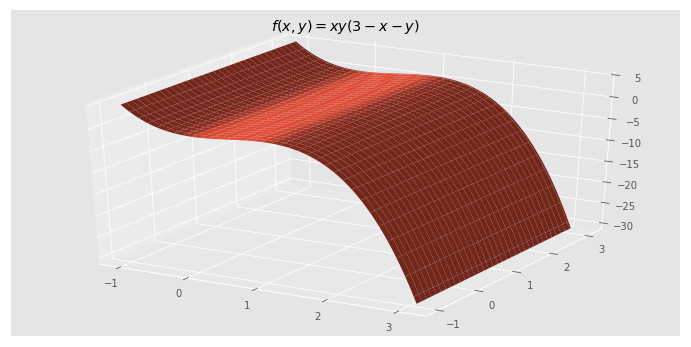

In [12]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

x=np.linspace(-1,3.1,101)
y=np.linspace(-1,3.1,101)
f=x*y*(3-x-y)
x,y=np.meshgrid(x,y)
ax.plot_surface(x,y,f)
ax.set_title("$f(x,y)=x y (3-x-y)$")

In [25]:
from sympy import hessian,symbols,solve,diff

grad = lambda func, vars :[diff(func,var) for var in vars]

x,y,z=symbols("x y z",real=True)
f=x*y*(3-x-y)
cpts=solve(grad(f,[x,y]),[x,y])
H=hessian(f,[x,y]);
#H2=hessian(f,[x,y])  
H_det=H.det();
#H2_det=H2.det()   
#print(cpts,H_det,H2_det)   
for cpt in cpts:
    print(cpt)
    det_H_val=H_det.subs({x:cpt[0],y:cpt[1]})
    #det_H2_val=H2_det.subs({x:cpt[0],y:cpt[1]})
    print("the critical point is (%s,%s) and  det(H2)=%s" %(cpt[0],cpt[1],det_H_val))           

(0, 0)
the critical point is (0,0) and  det(H2)=-9
(0, 3)
the critical point is (0,3) and  det(H2)=-9
(1, 1)
the critical point is (1,1) and  det(H2)=3
(3, 0)
the critical point is (3,0) and  det(H2)=-9


In [26]:
def criticaltype(f):
    cpts=solve(grad(f,[x,y]),[x,y])
    H=hessian(f,[x,y]);
    H_det=H.det();
    #H2_det=H.det()
    num=1
    if len(cpts)==0:
       print("   no critical point!")  
    elif (type(cpts)==dict):
       """
       If only one critical point, return {x:a,y:b} --- dict,
       if more than one point return {(a,b),(c,d),...} --- list
       """ 
       cx=cpts[x]
       cy=cpts[y]
       print("only one critical (x,y)=(%s,%s)" %(cx,cy))
       delta2=H_det.subs({x:cx,y:cy}) 
       if delta2<0:
          print("   Saddle point here.")
       elif delta2==0:
          print("   No conclusion.") 
       else:
          f1=diff(f,x,2).subs({x:cx,y:cy})
          if f1>0:
             print("   local minimum here.")
          else:
             print("   local maximum here.")
    else:
       for i in cpts: 
            cx=i[0]
            cy=i[1]
            print("%d. critical (x,y)=(%s,%s)" %(num,cx,cy))
            delta2=H_det.subs({x:cx,y:cy}) 
            if delta2<0:
               print("   Saddle point here.")
            elif delta2==0:
               print("   No conclusion.") 
            else:
               f1=diff(f,x,2).subs({x:cx,y:cy})
               if f1>0:
                  print("   local minimum here.")
               else:
                  print("   local maximum here.")
            #print(H_det)
            num+=1
    
       

In [27]:
f=x*y*(3-x-y)

criticaltype(f)

1. critical (x,y)=(0,0)
   Saddle point here.
2. critical (x,y)=(0,3)
   Saddle point here.
3. critical (x,y)=(1,1)
   local maximum here.
4. critical (x,y)=(3,0)
   Saddle point here.


1. $\nabla f =(y(3-x-y)-xy,x(3-x-y)-xy)=(y(3-2x-y),x(3-x-2y))=(0,0)$
- Hessian matrix
\begin{eqnarray*}
    H & = & \left(\begin{array}{cc}
      - 2y & 3-2x-2y\\
      3-2x-2y & - 2x
    \end{array}\right)
  \end{eqnarray*}
- critical values:<br>
  a. $y=0$ implies $x=0$ or $3-x=0$, i.e. $(0,0),(3,0)$; ($H<0$)<br>
  b. $3-2x-y=0$ implies 
    - $x=0$ and $y=3$, ($H<0$)
    - $3-x-2y=0$ implies $(x,y)=(1,1)$ ($H>0,a<0$)
    

**16. **  $f(x,y)=4y/(x^2+y^2+1)$

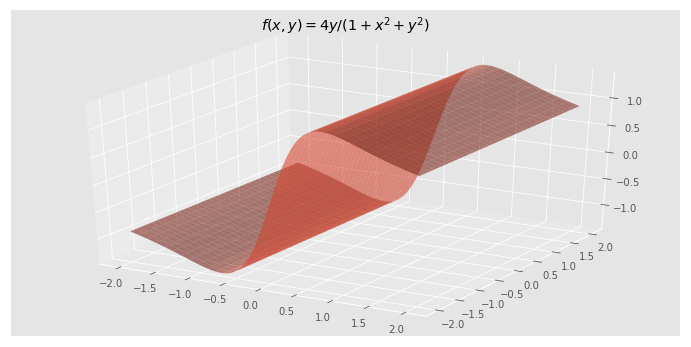

In [10]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

x=np.linspace(-2,2,101)
y=np.linspace(-2,2,101)
f=4*y/(1+x*x+y*y)
x,y=np.meshgrid(x,y)
ax.plot_surface(x,y,f,alpha=0.6)
ax.set_title("$f(x,y)=4y/(1+x^2+y^2)$")

In [28]:
f=4*y/(x**2+y**2+1)
criticaltype(f)

1. critical (x,y)=(0,-1)
   local minimum here.
2. critical (x,y)=(0,1)
   local maximum here.


1. $\nabla f =(-8xy/(x^2+y^2+1)^2,(4x^2-4y^2+4)/(x^2+y^2+1)^2)=(0,0)$
- Hessian matrix
\begin{eqnarray*}
    H & = & \frac{8}{(x^2+y^2+1)^3}\left(\begin{array}{cc}
      y(x^2-1-y^2) & x(y^2-1-x^2)\\
      x(3y^2-x^2-1) & y(x^2-3y^2+1)
    \end{array}\right)
  \end{eqnarray*}
- critical values: $x=0$ implies $y=\pm1$, i.e. $(0,1),(0,-1)$; ($H>0$)<br>
  a. $(x,y)=(0,1)$: $H>0,a<0$
  b. $(x,y)=(0,-1)$: $H>0,a>0$
    

**36. **  Find the absolute extrema of $f(x,y)=3x^2+2xy+y^2$ on the triangle with vertices $(-2,-1),(1,-1),(1,2)$.

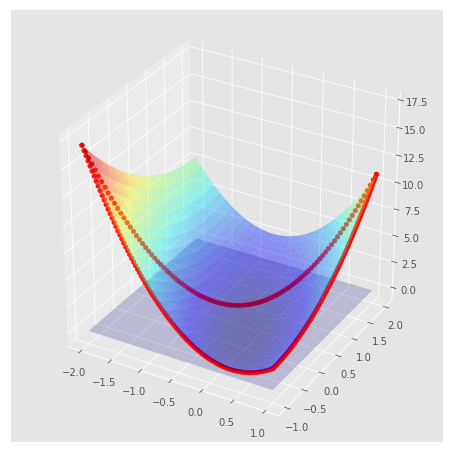

In [4]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

X = np.linspace(-2, 1, 30)
X1 = np.linspace(-2, 1, 100)
X2 = np.linspace(-2, 1, 100)
Y2 = X2+1

Y = np.linspace(-1, 2, 30)
Y1 = np.linspace(-1, 2, 100)

Zs =  3*X1**2-2*X1+1
Zt =  3+2*Y1+Y1**2

X,Y=np.meshgrid(X,Y)
func= 3*X*X+2*X*Y+Y*Y
base=0*X

Z2 = 3*X2*X2+2*X2*Y2+Y2*Y2


ax.scatter(X1,0*X1-1,Zs, color="red",alpha=0.9)
ax.scatter(0*Y1+1,Y1,Zt,color="red",alpha=0.9)
ax.scatter(X2,Y2, Z2,color="red",alpha=0.9)

ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)

ax.plot_surface(X,Y, base, rstride=1, cstride=1, cmap=cm.jet,alpha=0.2)


In [29]:
f=3*x**2+2*x*y+y**2
criticaltype(f)

only one critical (x,y)=(0,0)
   local minimum here.


In [30]:
f.subs({x:0,y:0})

0

In [31]:
#L1: (-2,-1) to (1,-1), x in [-2,1]
f1=f.subs({y:-1})
solve(diff(f1,x),x)

[1/3]

In [32]:
for  i in [-2,1/3,1]:
     print(f1.subs({x:i}))

17
0.666666666666667
2


In [19]:
#L2: (1,-1) to (1,2), y in [-1,2]
f2=f.subs({x:1})
solve(diff(f2,y),y)

[-1]

In [20]:
for  i in [-1,2]:
     print(f2.subs({y:i}))

2
11


In [21]:
#L3: (1,2) to (-2,-1), y-x=1 for x in [-2,1]
f3=f.subs({x:x,y:x+1})
solve(diff(f3,x),x)

[-1/3]

In [22]:
for  i in [-2,-1/3,1]:
     print(f3.subs({x:i}))

17
0.333333333333333
11


These conclude: maximum is $17$, munimum is $0$.

**40. **  Find the absolute extrema of $f(x,y)=4x^2+2x+y^2-y$ on the elipse $4x^2+y^2\le1$.

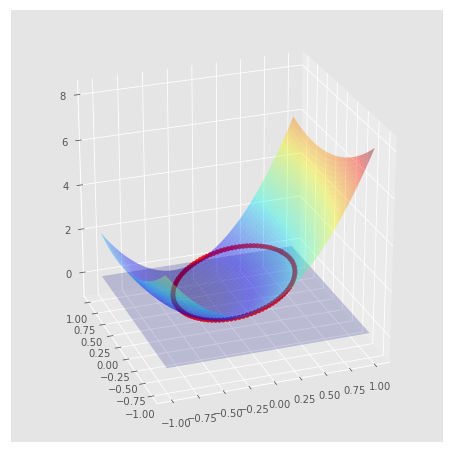

In [8]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

X = np.linspace(-1, 1, 100)
t = np.linspace(0, 2*np.pi, 100)
Xt = np.cos(t)/2
Yt = np.sin(t)

Y = np.linspace(-1, 1, 30)
Y1 = np.linspace(-1, 1, 100)


X,Y=np.meshgrid(X,Y)
func= 4*X*X+2*X+Y*Y-Y

base=0*X

ax.scatter(Xt,Yt,4*Xt**2+2*Xt+Yt**2-Yt, color="red",alpha=0.9)


ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)

ax.plot_surface(X,Y, base, rstride=1, cstride=1, cmap=cm.jet,alpha=0.2)
ax.view_init(azim=-110,elev=25)

In [33]:
f=4*x**2+y**2+2*x-y
criticaltype(f)

only one critical (x,y)=(-1/4,1/2)
   local minimum here.


In [34]:
f.subs({x:-1/4,y:1/2})

-0.500000000000000

In [35]:
# boundary
from sympy import sin,cos,pi
t=symbols("t",real=True)
ft=f.subs({x:cos(t)/2,y:sin(t)})

In [36]:
cpts=solve(diff(ft,t),t)
for cpt in cpts:
    fval=ft.subs({t:cpt})
    xt=cos(cpt)/2
    yt=sin(cpt)
    print("f(%s,%s)=%s" %(xt,yt,fval))

f(sqrt(2)/4,-sqrt(2)/2)=1 + sqrt(2)
f(-sqrt(2)/4,sqrt(2)/2)=-sqrt(2) + 1


These conclude: maximum is $1+\sqrt2$, munimum is $-0.5$.

**44.** Find the point on the surface $xy^2z=4$ that are closest to the origin and what is the shortest distance between them?

In [26]:
f=x**2+y**2+(4/x**2/y)**2
criticaltype(f)

1. critical (x,y)=(-2**(3/4),-2**(1/4))
   local minimum here.
2. critical (x,y)=(-2**(3/4),2**(1/4))
   local minimum here.
3. critical (x,y)=(2**(1/4)*sqrt(2),-2**(1/4))
   local minimum here.
4. critical (x,y)=(2**(1/4)*sqrt(2),2**(1/4))
   local minimum here.


**62.** Let $f(x,y)=x^2-y^2+2xy+2$.
1. no extrema since $f(x,y)\to\infty$, if $x\to\infty,y=0$, and   $f(x,y)\to-\infty$, if $y\to\infty,x=0$.
- Find extrema on $D=\{x^2+4y^2\le4\}$

In [36]:
f=x**2-y**2+2*x*y+2
criticaltype(f)

only one critical (x,y)=(0,0)
   Saddle point here.


In [37]:
ft=f.subs({x:2*cos(t),y:sin(t)})
cpts=solve(diff(ft,t),t)
print(cpts)
for cpt in cpts:
    fval=ft.subs({t:cpt})
    xt=2*cos(cpt)
    yt=sin(cpt)
    print("f(%s,%s)=%s" %(xt,yt,fval))

[2*atan(-5/4 + sqrt(2)*sqrt(-5*sqrt(41) + 41)/4 + sqrt(41)/4), -2*atan(5/4 + sqrt(41)/4 + sqrt(2)*sqrt(5*sqrt(41) + 41)/4), -2*atan(-sqrt(41)/4 + sqrt(2)*sqrt(-5*sqrt(41) + 41)/4 + 5/4), -2*atan(-sqrt(2)*sqrt(5*sqrt(41) + 41)/4 + 5/4 + sqrt(41)/4)]
f(2*cos(2*atan(-5/4 + sqrt(2)*sqrt(-5*sqrt(41) + 41)/4 + sqrt(41)/4)),sin(2*atan(-5/4 + sqrt(2)*sqrt(-5*sqrt(41) + 41)/4 + sqrt(41)/4)))=4*sin(2*atan(-5/4 + sqrt(2)*sqrt(-5*sqrt(41) + 41)/4 + sqrt(41)/4))*cos(2*atan(-5/4 + sqrt(2)*sqrt(-5*sqrt(41) + 41)/4 + sqrt(41)/4)) - sin(2*atan(-5/4 + sqrt(2)*sqrt(-5*sqrt(41) + 41)/4 + sqrt(41)/4))**2 + 4*cos(2*atan(-5/4 + sqrt(2)*sqrt(-5*sqrt(41) + 41)/4 + sqrt(41)/4))**2 + 2
f(2*cos(2*atan(5/4 + sqrt(41)/4 + sqrt(2)*sqrt(5*sqrt(41) + 41)/4)),-sin(2*atan(5/4 + sqrt(41)/4 + sqrt(2)*sqrt(5*sqrt(41) + 41)/4)))=-sin(2*atan(5/4 + sqrt(41)/4 + sqrt(2)*sqrt(5*sqrt(41) + 41)/4))**2 - 4*sin(2*atan(5/4 + sqrt(41)/4 + sqrt(2)*sqrt(5*sqrt(41) + 41)/4))*cos(2*atan(5/4 + sqrt(41)/4 + sqrt(2)*sqrt(5*sqrt(41) + 41)/4)

Note
---
For $(x,y)\in\partial D$,
\begin{eqnarray}
    f(x,y)&=&f(2\cos t,\sin t)\\
          &=&4\cos^2t-\sin^2t +4\sin t\cos t+2 \\
          &=& 2(1+\cos 2t)-\frac{1}{2}(1-\cos2t)+2\sin2t+2\\
          &=&\frac{5}{2}\cos2t+2\sin2t-\frac{3}{2}\\
         \Rightarrow && -\sqrt{(5/2)^2+2^2}+2\le f\le\sqrt{(5/2)^2+2^2}+2
\end{eqnarray}

Optimization Problem with Constraints
---

Theorem
---
  If a relative extrema of $f (x, y)$ and $g (x, y) = 0$ occurs at $(x, y)$,
  then there exists a $\lambda$ for which $(x, y, \lambda)$ is the critical
  point, $(a,b)$, of $L = f (x, y) + \lambda g (x, y)$, i.e.:
$$  \nabla f(a,b)+\lambda\nabla g(a,b)=\mathbf{0}$$

  This function is called
  **Lagrangian** of $f (x)$ and $g (x)$.

<img src="imgs/8/cal7-27.png" width=60% /> 

In real world, Lagrangian  is more realistic than other kinds of optimization
problem: finding extrema under resources limited.

For general case, $\mathbf{x}\in \mathbb{R}^n$, the extrema of $f(\mathbf{x}$ with constraint $g(\mathbf{x}=0$ at $\mathbf{x}_0$ should satisfy the following:
$$  \nabla f(\mathbf{x}_0)+\lambda\nabla g(\mathbf{x}_0)=\mathbf{0}$$
where  $\lambda\ne0$ and $\nabla g(\mathbf{x}_0)\ne\mathbf{0}$.

Example
---
  Suppose that the Cobb-Douglas function is
  $$ P (x, y) = 100 x^{1 / 4} y^{3 / 4} $$
  where $x$ is the unit of labor and $y$ is the unit of capital. Each unit of
  labor costs $200$ and each of capital costs 100. If the total of 800 worth
  of labor and capital is to be used, Find the maximum of $P (x, y)$.
  
First note:

the critical point at which $P (x, y)$ attains it maximum is also the
    critical point for $\ln P (x, y)$ that attains its maximum.

  
  Since the constraint is

$$ 200 x + 100 y = 800 $$
  consider the Lagrangian function:

\begin{eqnarray*}
    L (x, y, \lambda) & = & \ln P (x, y) + \lambda (800 - 200 x - 100 y)\\
    & = & \ln 100 + \frac{1}{4} \ln x + \frac{3}{4} \ln y + \lambda (800 -
    200 x - 100 y)
  \end{eqnarray*}

Note: The critical value of $P (x, y)$ is
    also critical value of $\ln P (x, y)$!}

Now the critical point(s) is as follows:

\begin{eqnarray*}
    \vec{0} & = & \nabla L (x, y, \lambda)\\
    & = & \left( \frac{\partial L}{\partial x}, \frac{\partial L}{\partial
    y}, \frac{\partial L}{\partial \lambda} \right)\\
    & = & \left( \frac{1}{4 x} - 200 \lambda, \frac{3}{4 y} - 100 \lambda,
    800 - 200 x - 100 y \right)\\
    \Longrightarrow &  & x = \frac{1}{800 \lambda}, y = \frac{3}{400 \lambda} 
    (\text{ i.e. } y = 6 x)\\
    \Longrightarrow &  & x = 1 \text{ and } y = 6
  \end{eqnarray*}

$(x, y) = (1, 6)$ is the only one critical point. Since $0 \leqslant x, y\le 8$, $P (x, y)$ has to be a maximum in such closed region.
  Therefore, $P (x, y)$ attains it maximum at $(1, 6)$.
  
  

In [112]:
x,y,z,l=symbols('x y z l')
expf=100
f=log(100)+log(x)/4+3*log(y)/4
cond=800-200*x-100*y
F=f+l*cond
cpts=solve(grad(F,[x,y,z]),[x,y,z])
l0=solve(cond.subs({x:cpts[x],y:cpts[y]}),l)
print('Function of %s with constraint %s:\n' %('100 x**(1/4)y**(3/4)',cond))
print('critical point (x,y) is (%s,%s)' %(cpts[x].subs(l,l0[0]),cpts[y].subs(l,l0[0])))


Function of 100 x**(1/4)y**(3/4) with constraint -200*x - 100*y + 800:

critical point (x,y) is (1,6)


Example
---
  Suppose you wishes to allocate your available time of $16$ hours in this
  week between quizzes, English and Calculus, held in the next week. What
  would you do in such way to maximize your grade average?

**Solution**
  
Suppose that
1. $f (t_1) = 20 + 20 \sqrt{t_1} $: the time will be spent for
English course with $t_1$ hour per week,
- $g (t_2) = 50 + 3 t$ : the time will be spent for Calculus course
 with $t_2$ hour per week.

Then the problem is turned to be:

\begin{eqnarray*}
      \text{Maximize } S (t_1, t_2) & = & \frac{f (t_1) + g (t_2)}{2}\\
      \text{ subject to } &  & t_1 + t_2 = 16
    \end{eqnarray*}
Consider the Lagrangian:
 $$ L (t_1, t_2) = 20 + 20 \sqrt{t_1} + 50 + 3 t_2 + \lambda (16 - t_1 -
       t_2) $$
The extremum occurs at the place that satisfies:

\begin{eqnarray*}
      \frac{\partial L}{\partial t_1} = 0, & \frac{\partial L}{\partial t_2} =
      0, & \frac{\partial L}{\partial \lambda} = 0.
    \end{eqnarray*}
And these imply:

\begin{eqnarray*}
      & \frac{10}{\sqrt{t_1}} - \lambda = 0, & 3 - \lambda = 0\\
      \Longrightarrow & t_1 = \left( \frac{10}{3} \right)^2 & \text{ and }  t_2 =
      16 - \left( \frac{10}{3} \right)^2
    \end{eqnarray*}
How do I know at which the maximum occurs? Since $S (t_1, t_2)$ is
continuous for both $t_1$ and $t_2$ are in bounded intervals, the function
obtains its maximum and minimum. Comparing with the function values at
boundary, $S (t_1, t_2)$ will obtains its maximum at $(t_1, t_2) = (1,15)$ with the constraint $t_1 + t_2 = 16$.

Theorem (Heron's formulae)
---
Suppose that The lengths of sides of triangle are $x, y$
and $z$ respectively and $x + y + z = l$. Then the area of this triangle is
  $\sqrt{s (s - x) (s - y) (s - z)}$ where $s = l / 2$.


Example
---
  Suppose that the perimeter is $24$. Find the dimension of this triangle such
  that it owns maximum area.
  
  Suppose $x, y, z$ are the lengths of sides of this triangle and let $A$ be
  its area. Then

\begin{eqnarray*}
    & \text{Maximize} & A = \sqrt{12 (12 - x) (12 - y) (12 - z)} \text{ with }
    x + y + z = 24\\
    \Longrightarrow & \text{Maximize } & 12 (12 - x) (12 - y) (12 - z)
    \text{ with } x + y + z = 24\\
    \Longrightarrow & \text{Maximize } & L (x, y, z, \lambda) = \ln (12 (12 -
    x) (12 - y) (12 - z)) + \lambda (24 - x - y - z)
  \end{eqnarray*}
Since
$$ L (x, y, z, \lambda) = \ln 12 + \ln (12 - x) + \ln (12 - y) + \ln (12 -
     z) + \lambda (24 - x - y - z) $$
  then the critical value of $L (x, y, z, \lambda)$ can be found by the
  following steps:

\begin{eqnarray*}
    \vec{0} & = & \nabla L (x, y, z, \lambda)\\
    & = & \left( \frac{\partial L}{\partial x}, \frac{\partial L}{\partial
    y}, \frac{\partial L}{\partial z}, \frac{\partial L}{\partial \lambda}
    \right)\\
    & = & \left( - \frac{1}{12 - x} - 1, - \frac{1}{12 - y} - 1, -
    \frac{1}{12 - z} - 1, 24 - x - y - z \right)
  \end{eqnarray*}
  This implies that $x = y = z = 8$, i.e. this triangle is equilateral. 

Exercise
---
Assume that $P (x, y) = 100 x^{1 / 4} y^{3 / 4}$. Then $\frac{\partial
  P}{\partial x} = \frac{25 y^{\frac{3}{4}}}{x^{\frac{3}{4}}}$ and
  $\frac{\partial P}{\partial y} = \frac{75
  x^{\frac{1}{4}}}{y^{\frac{1}{4}}}$.
1.  $\frac{\partial P}{\partial x} (1, 6) = 25 \sqrt[4]{6^3}$
-  $\frac{\partial P}{\partial y} (1, 6) = 75 / \sqrt[4]{6^{}}$
- $\frac{\partial P}{\partial x} (1, 6) / \frac{\partial P}{\partial
    y} (1, 6) = 25 \sqrt[4]{6^3} / (75 / \sqrt[4]{6^{}}) = 6 / 3 = 2$
- Let $F (x, y) = P (x, y) + \lambda (80 - 20 x - 10 y)$. Then

$$\text{ } 0 = \frac{\partial F}{\partial x} = \frac{25
       y^{\frac{3}{4}}}{x^{\frac{3}{4}}} - 20 \lambda \text{ and } 0 =
       \frac{\partial F}{\partial y} = \frac{75
       x^{\frac{1}{4}}}{y^{\frac{1}{4}}} - 10 \lambda $$
These imply $y = 6 x. \text{Therefore}$ $F (x, y)$ attains its maximum
    under the constraint $20 x + 10 y = 80$ as $x = 10$ and $y = 60$.

Example
---
Find the extrema of $f(x,y)=x^2-2y$ subject to $x^2+y^2=9$.

**1.** Let $L=f+\lambda(9-x^2-y^2)=x^2-2y+\lambda(9-x^2-y^2)$.<br>
**2.**
\begin{eqnarray}
    \vec{0} & = & \nabla L (x, y, \lambda)\\
    & = & \left( \frac{\partial L}{\partial x}, \frac{\partial L}{\partial
    y}, \frac{\partial L}{\partial \lambda}
    \right)\\
    & = & \left( 2x-2\lambda x, -2 - 2\lambda y ,  9-x^2-y^2 \right)
\end{eqnarray}
**3.**
  - $x=0\to 0^2+y^2=9\to y=\pm3$
  - $\lambda=1\to y=-1\to x=\pm2\sqrt2$
  - $f(0,-3)=6,f(0,3)=-6 (\min),f(\pm2\sqrt2,-1)=10 (\max)$

Example
---
Find the extrema of $f(x,y)=2x^2+y^2-2y+1$ subject to $x^2+y^2\le4$.

**0.** critical point:
$$\nabla f=(0,0)\to(x,y)=(0,1)$$
and $f(0,1)=0$.

**1.** Let $L=f+\lambda(4-x^2-y^2)=2x^2+y^2-2y+1+\lambda(4-x^2-y^2)$.<br>
**2.**
\begin{eqnarray}
    \vec{0} & = & \nabla L (x, y, \lambda)\\
    & = & \left( \frac{\partial L}{\partial x}, \frac{\partial L}{\partial
    y}, \frac{\partial L}{\partial \lambda}
    \right)\\
    & = & \left( 4x-2\lambda x, 2y-2 - 2\lambda y ,  4-x^2-y^2 \right)
\end{eqnarray}
**3.**
  - $x=0\to 0^2+y^2=4\to y=\pm2$
  - $\lambda=2\to y=-1\to x=\pm\sqrt3$
  - $f(0,1)=0$ (minimum), $f(0,-2)=9,f(0,2)=1,f(\pm\sqrt3,-1)=10$ (maximum).

Example (With two constraints)
---
Find the extrema of $f(x,y,z)=3x+2y+4z$ subject to $x-y+2z=1$ and $x^2+y^2=4$.

**1.** Let $L=f+\lambda(1-x+y-2z)+\mu(4-x^2-y^2)=3x+2y+4z+\lambda(1-x+y-2z)+\mu(4-x^2-y^2)$.<br>
**2.** Find critical point(s):
\begin{eqnarray}
    \vec{0\!} & = & \nabla L (x, y, z,\lambda,\mu)\\
    & = & \left( \frac{\partial L}{\partial x}, \frac{\partial L}{\partial y}, 
    \frac{\partial L}{\partial z}, \frac{\partial L}{\partial \lambda},
    \frac{\partial L}{\partial\mu}
    \right)\\
    & = & \left( 3-\lambda -2\mu x, 2+\lambda-2\mu y,4-2\lambda ,  ...,...\right)
\end{eqnarray}
**3.**
  - $\lambda=2\to x=1/(2\mu) \text{ and }y=2/\mu$
  - $x^2+y^2=4\to \mu=\pm\sqrt{17}/4\to(x,y,z)=\left(\pm2/\sqrt{17},\pm8/\sqrt{17},\frac{1}{2}\left(1\pm\frac{6}{\sqrt{17}}\right)\right)$
  - Maximum $f\left(2/\sqrt{17},8/\sqrt{17},\frac{1}{2}\left(1+\frac{6}{\sqrt{17}}\right)\right)=2(1+\sqrt{17})$,
  - Minimum $f\left(-2/\sqrt{17},-8/\sqrt{17},\frac{1}{2}\left(1-\frac{6}{\sqrt{17}}\right)\right)=2(1-\sqrt{17})$.
  

Exercise
---
1. Find the extrema of $f (x, y) = x y^2$ with $2 x^2 + y^2 = 12$.
- Find the extrema of $f (x, y, z) = 10 x + 2 y + 6 z$ with $x^2 + y^2+ z^2 = 35$.

In [117]:
#from sympy import jacobian
#grad = lambda func, vars : Matrix(1,1,[func]).jacobian(vars)
f1=x*y*y
cond=12-2*x*x-y*y
L=f1+l*cond
cpts=solve(grad(L,[x,y,l]),[x,y,l])
print(max([p[0]*p[1]*p[1] for p in cpts]))

8*sqrt(2)


In [118]:
f2=10*x+2*y+6*z
cond=35-x*x-y*y-z*z
L=f2+l*cond
cpts=solve(grad(L,[x,y,z,l]),[x,y,z,l])
print(max([10*p[0]+2*p[1]+6*p[2] for p in cpts]))

70


Exercise p1138
---
**10.** Find the extrema of $f(x,y)=x^2+y^2$ with $x^4+y^4=1$.

In [4]:
from sympy import symbols,solve
x,y,z,l,m=symbols("x y z l m",real=True)

In [51]:
f1=x*x+y*y
cond=1-x**4-y**4
L=f1+l*cond
cpts=solve(grad(L,[x,y,l]),[x,y,l])
print("Maximum is %s" %max([p[0]*p[0]+p[1]*p[1] for p in cpts]))
print("Minimum is %s" %min([p[0]*p[0]+p[1]*p[1] for p in cpts]))

Maximum is sqrt(2)
Minimum is 1



**14.** Find the extrema of $f(x,y)=x^2+y^2+z^2$ with $y-x=1$.

In [66]:
f2=x*x+y*y+z*z
cond2=1+x-y
L2=f2+l*cond2
cpts=solve(grad(L2,[x,y,z,l]),[x,y,z,l])
#print("Maximum is %s" %max([p[0]*p[0]+p[1]*p[1]+p[2]*p[2] for p in cpts]))
#print("Minimum is %s" %min([p[0]*p[0]+p[1]*p[1]+p[2]*p[2] for p in cpts]))
cpts

{l: 1, x: -1/2, y: 1/2, z: 0}

Since $x^2+y^2+z^2\ge0$,  only minimum attains and at $(x,y,z)=(-1/2,1/2,0)$, i.e. min=$1/2$.


**18.** Find the extrema of $f(x,y)=x+y+z$ with $x^2+y^2=1$ with $x+z=2$.

In [70]:
f3=x+y+z
cond31=1-x**2-y**2
cond32=2-x-z
L3=f3+l*cond31+m*cond32
cpts=solve(grad(L3,[x,y,z,l,m]),[x,y,z,l,m])
print("Maximum is %s" %max([p[0]+p[1]+p[2] for p in cpts]))
print("Minimum is %s" %min([p[0]+p[1]+p[2] for p in cpts]))


Maximum is 3
Minimum is 1



**22.** Find the extrema of $f(x,y)=x^2y$ with $4x^2+y^2\le4$.

In [5]:
f=x**2*y
solve(grad(f,[x,y]),[x,y])

[(0, 0)]

In [6]:
f=x*x*y
cond=1-4*x**2-y**2
L=f+l*cond
cpts=solve(grad(L,[x,y,l]),[x,y,l])
print("Maximum on the boundary is %s" %max([p[0]*p[0]*p[1] for p in cpts]))
print("Minimum on the boundary is %s" %min([p[0]*p[0]*p[1] for p in cpts]))

Maximum on the boundary is sqrt(3)/18
Minimum on the boundary is -sqrt(3)/18


After all, Maximum is $\sqrt3/18$, and Minimum is $-\sqrt3/18$.


In [13]:
cpts

[(0, -1, 0),
 (0, 1, 0),
 (-sqrt(6)/6, -sqrt(3)/3, -sqrt(3)/12),
 (-sqrt(6)/6, sqrt(3)/3, sqrt(3)/12),
 (sqrt(6)/6, -sqrt(3)/3, -sqrt(3)/12),
 (sqrt(6)/6, sqrt(3)/3, sqrt(3)/12)]

The Method of Least Squares
---

Suppose that there are $n$ paired data,  $(x_1, y_1), (x_2, y_2), \cdots,
(x_n, y_n)$, that were observed in one experiment. Can we find the approximate
relation between $X = x_i$ and $Y = y_i$?


<img src="imgs/8/cal7-28.png" width=60% /> 


The real relation between $X$ and $Y$ can not be found out even by rigours
theory. Thus the approximation will be a good replaced solution. There are
still some problems that have to be considered:
1. Which relation do we want? The simple linear relation, i.e. $Y = m X +
  b$, is a good suggestion;
- Since the relation is an approximation, the error can not be ignored.
  As shown in the last picture:
$$l_1, l_2, \cdots, l_5 \text{ errors}$$

The linear approximation will be a good candidate if the sum of errors

$$ E = l_1 + \cdots + l_5 $$
  is minimum! But different signs of errors will reduce the sum of errors.
  This means that the sum of errors is very small but the differences between
  exact values and observed data are very large. Therefore we can consider to
  minimize the sum of the square of errors:

$$ \color{brown}{E' = l_1^2 + \cdots + l_5^2} $$

The following famous theorem given by Gauss describes how to predict the
relation from the data come from the real world:



Theorem
---
  The line $l = m x + b$ that best fits the data points $(x_1, y_1), (x_2,
  y_2), \cdots, (x_n, y_n)$ is the line for which sum of the sum of square
  errors
  $$ E_1 + E_2 + \cdots + E_n, \text{ where } E_i = (y_i - m x_i - b)^2 $$
  is a minimum and

$$ m = \frac{\overline{x y} - \bar{x} \bar{y}}{\overline{x^2} - \bar{x}^2},
     b = \frac{\overline{x^2} \bar{y} - \bar{x} \overline{x y}}{\overline{x^2}
     - \bar{x}^2} $$
  Here, we use the notation of "average of variable",
  $\overline{\color{brown}{\cdot}}$, to represent the sum of relative
  variables, for example,

$$ \overline{x y} = \frac{1}{n} \sum_{k = 1}^n x_k y_k $$


**Proof**

  Since the sum of total error, $E_i$, is sum of (positive)
  square of errors, it must attain its minimum, i.e.

$$ E = \sum_{k = 1}^n E_i = \sum_{k = 1}^n (y_i - \color{brown}{m} x_i -
     \color{brown}{b})^2 $$
  $\min E$ exists since the last sum is sum of positive squares. Then the
  critical value satisfies

$$ 0 = \frac{\partial E}{\partial m} = - 2 \sum_{k = 1}^n x_i (y_i - m x_i -
     b) $$ 

$$ 0 = \frac{\partial E}{\partial b} = - 2 \sum_{k = 1}^n (y_i - m x_i - b)$$
   And these can be reduced into the following linear system equations:

$$ m \sum_{k = 1}^n x_k^2 + b \sum_{k = 1}^n x_k = \sum_{k = 1}^n y_k x_k
     \longrightarrow \color{brown}{m}  \overline{x^2} + \color{brown}{b}
     \bar{x} = \overline{x y} $$

$$m \sum_{k = 1}^n x_k^{} + n b = \sum_{k = 1}^n y_k \longrightarrow
     \color{brown}{m}  \overline{x^{}} + \color{brown}{b} = \overline{y}$$
  
  And by the general procedure of solving linear system of equations:

\begin{eqnarray*}
    m & = & \frac{\left|\begin{array}{cc}
      \overline{x y} & \bar{x}\\
      \overline{y} & 1
    \end{array}\right|}{\left|\begin{array}{cc}
      \overline{x^2 } & \bar{x}\\
      \overline{x} & 1
    \end{array}\right|}\\
    & = & \frac{\overline{x y} - \bar{x} \bar{y}}{\overline{x^2} - \bar{x}^2}
    \\
    b & = & \frac{\left|\begin{array}{cc}
      \overline{x^2} & \overline{x y}\\
      \overline{x} & \bar{y}
    \end{array}\right|}{\left|\begin{array}{cc}
      \overline{x^2 } & \bar{x}\\
      \overline{x} & 1
    \end{array}\right|}\\
    & = & \frac{\overline{x^2} \bar{y} - \bar{x} \overline{x
    y}}{\overline{x^2} - \bar{x}^2}
  \end{eqnarray*}
  
  
  we have the result.




Example
---
  The discount rate (in $\%$) for 5 months beginning in June of a given year
  in U.S.A. is as following table:
  

      June  July  August  September  October
       14    13    10       10          9

1. Find the linear approximation for discount rate with respect to time
  (month), i.e. the least square regression.
- Predict the discount rates in November and December.

**Sol:** Let $x_i$ be the number of $i$-months after June with $y_i$
be the discount rate during this month, then we
have

$$ \sum_{i = 1}^5 x_i = 10 ; \sum_{i = 1}^5 y_i = 56 ; \sum_{i = 1}^5 x_i^2 =
   30 ; \sum_{i = 1}^5 x_i y_i = 99. $$


**1. **

$$y = m x + b = \frac{5 \cdot 99 - 10 \cdot 56}{5 \cdot 30^{} - 10^2} x
  + \frac{30 \cdot 56 - 10 \cdot 99}{5 \cdot 30^{} - 10^2} = - \frac{13}{10} x
  + \frac{69}{5}$$

**2.** Since Nov. and Dec. $x'$s are 5 and 6 respectively, we have

$$ y_{\text{Nov}} = - \frac{13}{10} 5 + \frac{69}{5} = 7.3\%;\\ y_{\text{Dec}}
     = - \frac{13}{10} 6 + \frac{69}{5} = 6\% $$

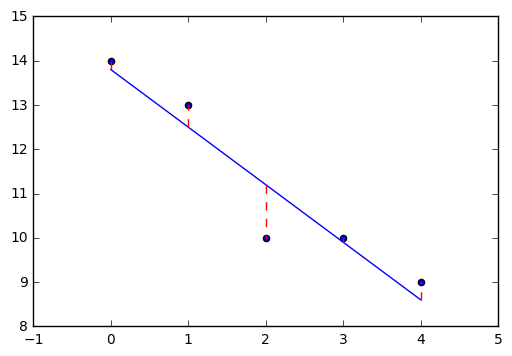

In [126]:
x=np.arange(0,5,1)
y=[14, 13, 10, 10, 9]
A=np.column_stack([x,np.ones_like(x)])
c,resid,rank,sigma=np.linalg.lstsq(A,y)
z=c[0]*x+c[1]*np.ones(len(x))
plt.plot(x,z)
plt.scatter(x,y)
for i in range(len(x)):
    plt.plot([x[i],x[i]],[z[i],y[i]],'r--')

Example
---
  Suppose the last 7 records of average week stock price for certain a company
  (PRIME VIEW INTERNATIONAL CO., LTD.) in Taiwan is listed as follows:
  $$ \begin{array}{llllllll}
       \text{Week} & 3 / 26 \sim 3 / 30 & 4 / 2 \sim 4 / 6 & 4 / 9 \sim 4 / 13
       & 4 / 16 \sim 4 / 20 & 4 / 23 \sim 4 / 27 & 4 / 30 \sim 5 / 4 & 5 / 7
       \sim 5 / 11\\
       \text{Price} & 17.8 & 19.6 & 21.9 & 20.85 & 23.0 & 23.6 & 24.4
     \end{array} $$
1. Find the linear approximation of the relation between time (in week)
    and stock price.
- Predict the stock price that will be in the next week (i.e. $5 / 14
    \sim 5 / 18$). (The real value is 25.85)

**Sol:**
  
  Suppose that $(x_i, y_i)$ be the paired (week,price) record for $i = 1, 2,
  3, 4, 5, 6, 7$. Then
$$ \sum_{i = 1}^7 x_i = 28, \sum_{i = 1}^7 y_i = 151.15, \sum_{i = 1}^7
     x_i^2 = 140, \sum_{i = 1}^7 x_i y_i = 642.5 $$

**1.**

\begin{eqnarray*}
      m & = & \frac{\overline{x y} - \bar{x} \bar{y}}{\overline{x^2} -
      \bar{x}^2}\\
      & \sim & 1.032\\
      b & = & \frac{\overline{x^2} \bar{y} - \bar{x} \overline{x
      y}}{\overline{x^2} - \bar{x}^2}\\
      & \sim & 17.46
    \end{eqnarray*}

This means
$$ y = 1.032 x + 17.46 $$

**2.** The price in the next week will be approximately estimated as:

$$ 1.032 \cdot 8 + 17.46 = 25.72 $$

Comparing with the real value $(25.85)$, the error is within $1\%$!


Exercise
---
  Find the least square approximations for the following data:
1. $(x_{i,} y_i) = (0, 20), (2, 24), (4, 25), (6, 32), (8, 34)$ for
    i=1,2,3,4,5
- $(x_{i,} y_i) = (0, 160), (1, 164), (2, 168), (3, 171), (4, 175)$
    for i=1,2,3,4,5

**Answer**

1.$$\sum_{i = 1}^5 x_i = 20 ; \sum_{i = 1}^5 y_i = 135 ; \sum_{i = 1}^5
     x_i^2 = 120 ; \sum_{i = 1}^5 x_i y_i = 612. $$
  Therefore $$y = m x + b = \frac{9}{5} x + \frac{99}{5}\text{ and }y_{1994} =
  \frac{189}{5}y_{2000} = \frac{243}{5}$$
**2.** $\sum_{i = 1}^5 x_i = 10 ; \sum_{i = 1}^5 y_i = 838 ; \sum_{i = 1}^5
  x_i^2 = 30 ; \sum_{i = 1}^5 x_i y_i = 1713$. 
  Therefore $y = m x + b =
  \frac{37}{10} x + \frac{801}{5}$ and $y_{1995} =\left. y\right|_{x = 5} = 178.7$
  $y_{1998} = \left.y\right|_{x = 5.6} = 180.92$


In [1]:
!jupyter nbconvert 6*-3.ipynb

[NbConvertApp] Converting notebook 6 Multi-variable Calculus Differentiation-3.ipynb to html
[NbConvertApp] Writing 2913867 bytes to 6 Multi-variable Calculus Differentiation-3.html
